In [17]:
import numpy

In [18]:
import networkx as nx
import random

def generate_random_digraph(num_nodes, p_edge):
    """
    Generates a random directed graph with num_nodes nodes.
    For each pair of distinct nodes (u, v):
    - An edge exists between them with probability p_edge.
    - If an edge exists, it's either u -> v or v -> u with 50% probability each.
    """
    G = nx.DiGraph()
    G.add_nodes_from(range(num_nodes))

    nodes = list(range(num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i == j:
                continue # No self-loops

            if random.random() < p_edge:
                if random.random() < 0.5:
                    G.add_edge(nodes[i], nodes[j]) # i -> j
                else:
                    G.add_edge(nodes[j], nodes[i]) # j -> i
    return G

def check_second_neighbor_property(G):
    """
    Checks if there exists at least one node v in the graph G
    such that |N^{++}(v)| >= |N^+(v)|.
    """
    for v in G.nodes():
        first_neighbors = set(G.successors(v))
        
        second_neighbors = set()
        for u in first_neighbors:
            for w in G.successors(u):
                if w != v: # Exclude the starting node itself from second neighbors
                    second_neighbors.add(w)
        
        if len(second_neighbors) >= len(first_neighbors):
            return True # Found a node that satisfies the property
    return False # No node in this graph satisfies the property

# Simulation parameters
NUM_NODES = 25
P_EDGE = 0.5
NUM_SIMULATIONS = 1000 # Number of graphs to generate and test

graphs_satisfying_property = 0

print(f"Running {NUM_SIMULATIONS} simulations with {NUM_NODES} nodes and P_EDGE={P_EDGE}...")

for i in range(NUM_SIMULATIONS):
    if (i + 1) % 100 == 0:
        print(f"  Simulation {i+1}/{NUM_SIMULATIONS}")

    graph = generate_random_digraph(NUM_NODES, P_EDGE)
    if check_second_neighbor_property(graph):
        graphs_satisfying_property += 1

print("\n--- Simulation Results ---")
print(f"Total graphs generated: {NUM_SIMULATIONS}")
print(f"Graphs satisfying the property: {graphs_satisfying_property}")
print(f"Percentage: {graphs_satisfying_property / NUM_SIMULATIONS * 100:.2f}%")

if graphs_satisfying_property == NUM_SIMULATIONS:
    print("\nObservation: Every graph generated satisfied the property. This aligns with the known theorem.")
else:
    print("\nObservation: Some graphs did not satisfy the property. This is unexpected given the known theorem.")

Running 1000 simulations with 25 nodes and P_EDGE=0.5...
  Simulation 100/1000
  Simulation 200/1000
  Simulation 300/1000
  Simulation 400/1000
  Simulation 500/1000
  Simulation 600/1000
  Simulation 700/1000
  Simulation 800/1000
  Simulation 900/1000
  Simulation 1000/1000

--- Simulation Results ---
Total graphs generated: 1000
Graphs satisfying the property: 1000
Percentage: 100.00%

Observation: Every graph generated satisfied the property. This aligns with the known theorem.


Generating and visualizing 5 graphs with 25 nodes and P_EDGE=0.5...


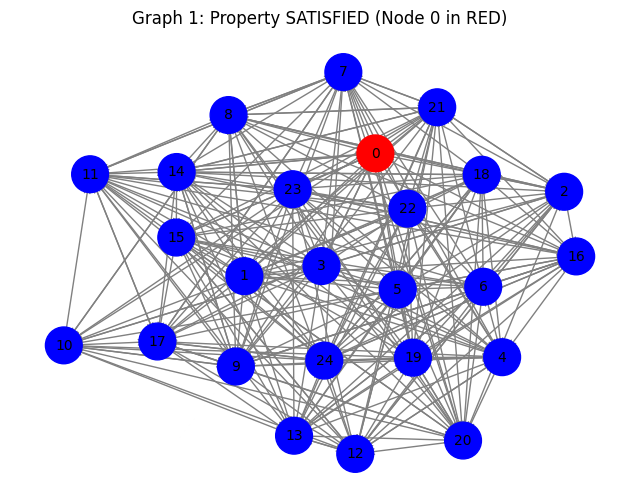

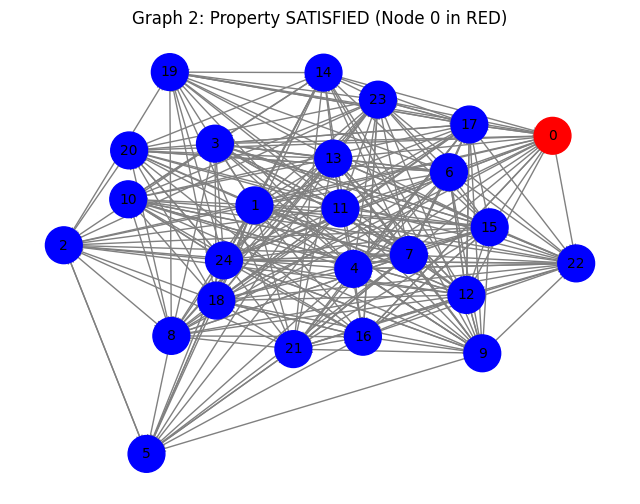

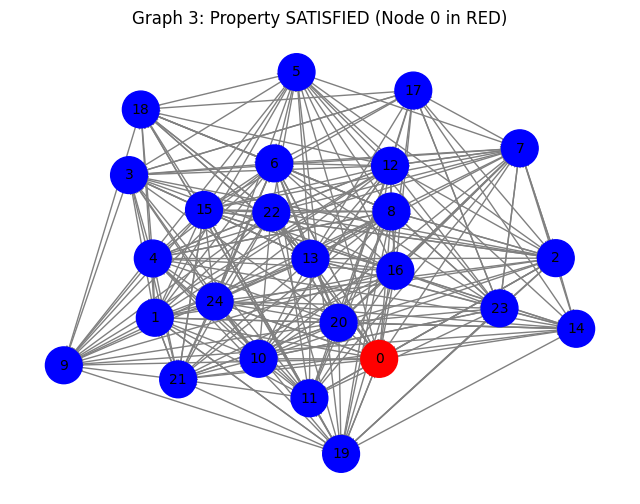

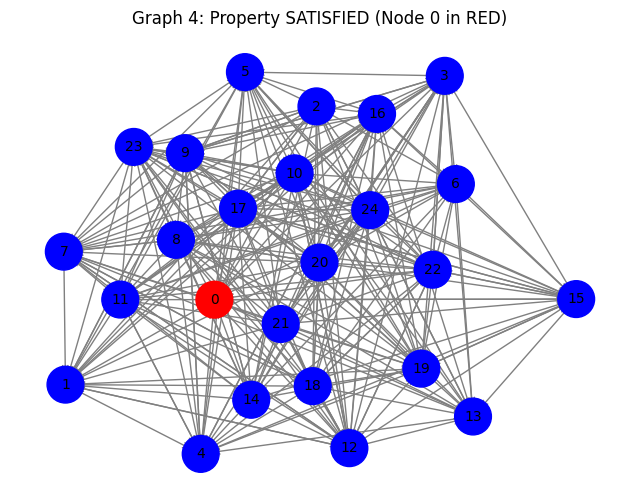

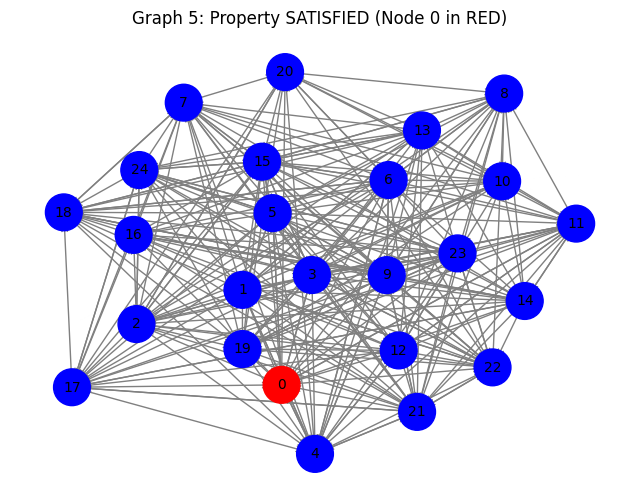


Finished visualizing graphs.


In [19]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def generate_random_digraph(num_nodes, p_edge):
    """
    Generates a random directed graph with num_nodes nodes.
    For each pair of distinct nodes (u, v):
    - An edge exists between them with probability p_edge.
    - If an edge exists, it's either u -> v or v -> u with 50% probability each.
    """
    G = nx.DiGraph()
    G.add_nodes_from(range(num_nodes))

    nodes = list(range(num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i == j:
                continue # No self-loops

            if random.random() < p_edge:
                if random.random() < 0.5:
                    G.add_edge(nodes[i], nodes[j]) # i -> j
                else:
                    G.add_edge(nodes[j], nodes[i]) # j -> i
    return G

def get_satisfying_node(G):
    """
    Returns a node v in the graph G such that |N^{++}(v)| >= |N^+(v)|,
    or None if no such node exists.
    """
    for v in G.nodes():
        first_neighbors = set(G.successors(v))
        
        second_neighbors = set()
        for u in first_neighbors:
            for w in G.successors(u):
                if w != v: # Exclude the starting node itself from second neighbors
                    second_neighbors.add(w)
        
        # For debugging/verification:
        # print(f"Node {v}: First Neighbors ({len(first_neighbors)})={first_neighbors}, Second Neighbors ({len(second_neighbors)})={second_neighbors}")

        if len(second_neighbors) >= len(first_neighbors):
            return v # Found a node that satisfies the property
    return None # No node in this graph satisfies the property

def draw_graph(G, graph_index, satisfying_node=None):
    """
    Draws the graph, coloring the satisfying node red and others blue.
    If no satisfying node, all are blue.
    """
    node_colors = ['blue'] * len(G.nodes())
    node_labels = {node: f"{node}" for node in G.nodes()}

    if satisfying_node is not None:
        node_colors[satisfying_node] = 'red'
        title = f"Graph {graph_index + 1}: Property SATISFIED (Node {satisfying_node} in RED)"
    else:
        title = f"Graph {graph_index + 1}: Property NOT SATISFIED (All nodes BLUE)"

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, k=0.8, iterations=50) # Adjust k and iterations for better spacing
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=700)
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10, edge_color='gray')
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Simulation parameters
NUM_NODES = 25
P_EDGE = 0.5
NUM_GRAPHS_TO_DRAW = 5 # Number of graphs to visualize

print(f"Generating and visualizing {NUM_GRAPHS_TO_DRAW} graphs with {NUM_NODES} nodes and P_EDGE={P_EDGE}...")

for i in range(NUM_GRAPHS_TO_DRAW):
    graph = generate_random_digraph(NUM_NODES, P_EDGE)
    
    # Get the node that satisfies the property (if any)
    node_to_color_red = get_satisfying_node(graph)
    
    draw_graph(graph, i, satisfying_node=node_to_color_red)

print("\nFinished visualizing graphs.")

Generating and visualizing 5 graphs with 25 nodes and P_EDGE=0.01...


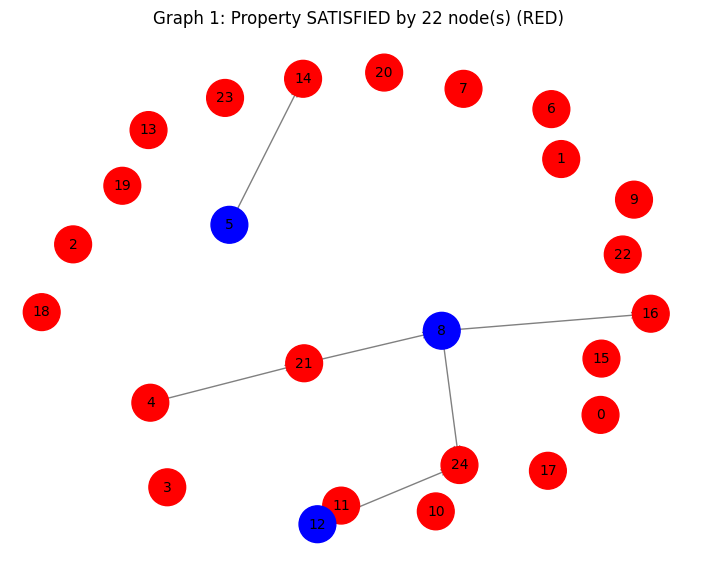

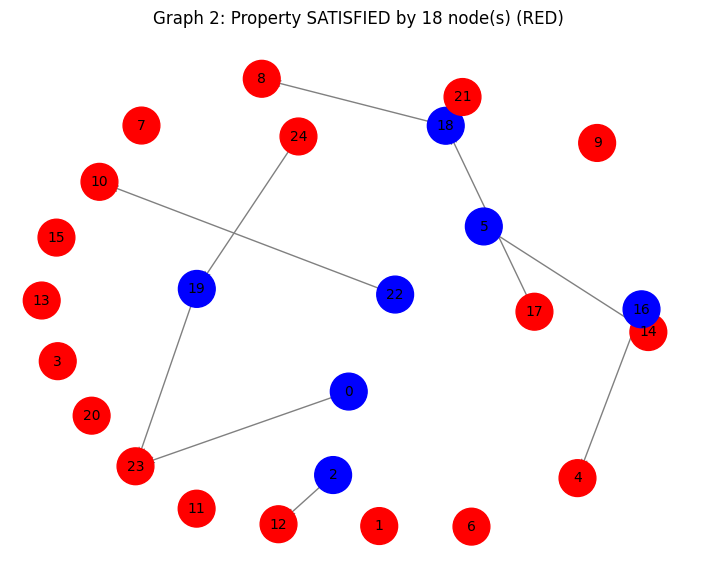

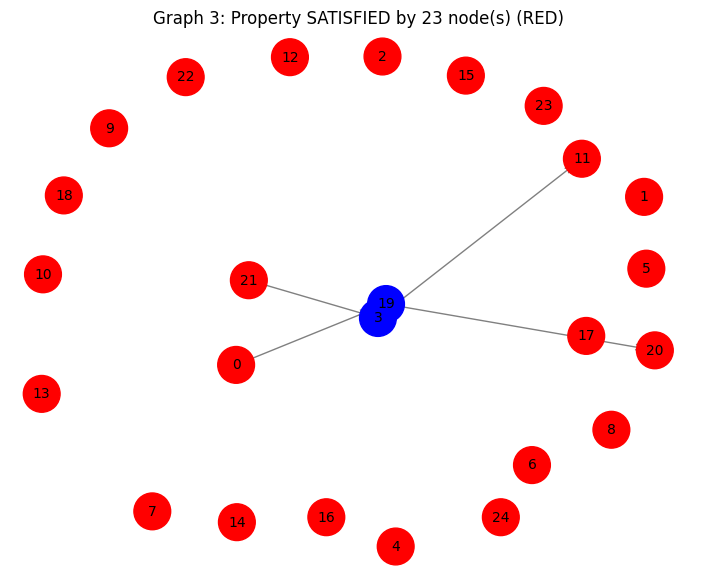

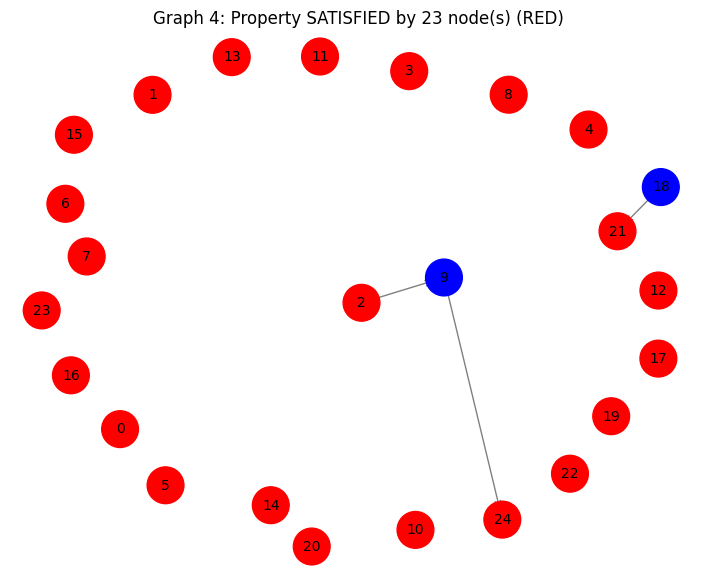

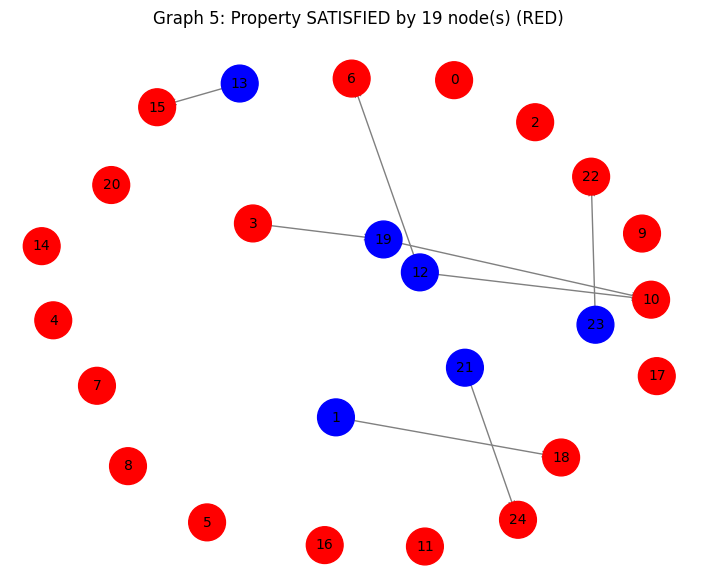


Finished visualizing graphs.


In [20]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# (generate_random_digraph function remains the same)
def generate_random_digraph(num_nodes, p_edge):
    G = nx.DiGraph()
    G.add_nodes_from(range(num_nodes))

    nodes = list(range(num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i == j:
                continue # No self-loops

            if random.random() < p_edge:
                if random.random() < 0.5:
                    G.add_edge(nodes[i], nodes[j]) # i -> j
                else:
                    G.add_edge(nodes[j], nodes[i]) # j -> i
    return G

# --- MODIFIED get_all_satisfying_nodes function ---
def get_all_satisfying_nodes(G):
    """
    Returns a list of all nodes v in the graph G such that |N^{++}(v)| >= |N^+(v)|.
    Second neighbors specifically exclude first neighbors and the starting node itself.
    """
    satisfying_nodes_list = []
    for v in G.nodes():
        first_neighbors = set(G.successors(v))
        
        raw_second_neighbors = set()
        for u in first_neighbors:
            for w in G.successors(u):
                raw_second_neighbors.add(w)
        
        # Crucial step: Exclude first neighbors and the starting node itself
        # from the set of second neighbors.
        second_neighbors = (raw_second_neighbors - first_neighbors)
        if v in second_neighbors:
            second_neighbors.remove(v) # Ensure starting node is never counted

        # Optional: print for debugging/verification of counts
        # print(f"Graph Node {v}: Out-degree ({len(first_neighbors)})={first_neighbors}, Second Neighbors ({len(second_neighbors)})={second_neighbors}")

        if len(second_neighbors) >= len(first_neighbors):
            satisfying_nodes_list.append(v)
            
    return satisfying_nodes_list

# (draw_graph function remains the same)
def draw_graph(G, graph_index, satisfying_nodes_list):
    node_colors = []
    for node in G.nodes():
        if node in satisfying_nodes_list:
            node_colors.append('red')
        else:
            node_colors.append('blue')
            
    node_labels = {node: f"{node}" for node in G.nodes()}

    if satisfying_nodes_list: # If the list is not empty
        title = f"Graph {graph_index + 1}: Property SATISFIED by {len(satisfying_nodes_list)} node(s) (RED)"
    else:
        title = f"Graph {graph_index + 1}: Property NOT SATISFIED by any node (All BLUE)"

    plt.figure(figsize=(9, 7))
    pos = nx.spring_layout(G, k=0.8, iterations=50)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=700)
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10, edge_color='gray')
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Simulation parameters
NUM_NODES = 25
P_EDGE = 0.01
NUM_GRAPHS_TO_DRAW = 5

print(f"Generating and visualizing {NUM_GRAPHS_TO_DRAW} graphs with {NUM_NODES} nodes and P_EDGE={P_EDGE}...")

for i in range(NUM_GRAPHS_TO_DRAW):
    graph = generate_random_digraph(NUM_NODES, P_EDGE)
    
    all_satisfying_nodes = get_all_satisfying_nodes(graph)
    
    draw_graph(graph, i, all_satisfying_nodes)

print("\nFinished visualizing graphs.")

In [21]:
# CORRECTED AND IMPROVED VERSION FOR LARGE GRAPH ANALYSIS

import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def generate_random_digraph_improved(num_nodes, p_edge):
    """
    Improved random digraph generation with clearer edge probability.
    Each possible directed edge (i,j) exists with probability p_edge.
    """
    G = nx.DiGraph()
    G.add_nodes_from(range(num_nodes))
    
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j and random.random() < p_edge:
                G.add_edge(i, j)
    return G

def analyze_seymour_vertices_detailed(G):
    """
    Analyze all vertices for the Seymour property and return detailed information.
    """
    analysis = {}
    
    for v in G.nodes():
        first_neighbors = set(G.successors(v))
        
        # Collect all vertices reachable in exactly 2 steps
        raw_second_neighbors = set()
        for u in first_neighbors:
            for w in G.successors(u):
                raw_second_neighbors.add(w)
        
        # Remove first neighbors and the vertex itself to get true second neighbors
        second_neighbors = raw_second_neighbors - first_neighbors
        second_neighbors.discard(v)  # Remove v if it exists
        
        analysis[v] = {
            'out_degree': len(first_neighbors),
            'first_neighbors': first_neighbors,
            'second_neighbors': second_neighbors,
            'second_neighbor_count': len(second_neighbors),
            'satisfies_property': len(second_neighbors) >= len(first_neighbors),
            'ratio': len(second_neighbors) / max(len(first_neighbors), 1)  # Avoid division by zero
        }
    
    return analysis

def get_all_seymour_vertices(G):
    """
    Get all vertices that satisfy the Seymour property.
    """
    analysis = analyze_seymour_vertices_detailed(G)
    return [v for v, data in analysis.items() if data['satisfies_property']]

def debug_vertex_analysis(G, vertex_id):
    """
    Debug function to print detailed analysis for a specific vertex.
    """
    analysis = analyze_seymour_vertices_detailed(G)
    if vertex_id in analysis:
        data = analysis[vertex_id]
        print(f"\n=== VERTEX {vertex_id} ANALYSIS ===")
        print(f"Out-degree: {data['out_degree']}")
        print(f"First neighbors: {data['first_neighbors']}")
        print(f"Second neighbors: {data['second_neighbors']}")
        print(f"Second neighbor count: {data['second_neighbor_count']}")
        print(f"Satisfies Seymour property: {data['satisfies_property']}")
        print(f"Ratio (|N²⁺(v)|/|N⁺(v)|): {data['ratio']:.3f}")
    else:
        print(f"Vertex {vertex_id} not found in graph")

def draw_graph_corrected(G, graph_index, seymour_vertices_list=None, max_nodes_to_draw=30):
    """
    CORRECTED draw function with proper node coloring.
    Only draws if graph is small enough to be readable.
    """
    if len(G.nodes()) > max_nodes_to_draw:
        print(f"Graph {graph_index + 1} has {len(G.nodes())} nodes (too large to visualize clearly)")
        return
    
    # CORRECT way to create node colors - iterate through nodes in order
    node_colors = []
    for node in G.nodes():
        if seymour_vertices_list and node in seymour_vertices_list:
            node_colors.append('red')
        else:
            node_colors.append('lightblue')
    
    node_labels = {node: str(node) for node in G.nodes()}
    
    if seymour_vertices_list:
        title = f"Graph {graph_index + 1}: {len(seymour_vertices_list)} Seymour vertices (RED): {seymour_vertices_list}"
    else:
        title = f"Graph {graph_index + 1}: No Seymour vertices found"
    
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=1.5, iterations=50)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, alpha=0.8)
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15, edge_color='gray', alpha=0.6)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_color='black')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def statistical_analysis_large_graphs(num_simulations=1000, num_nodes=50, p_edge=0.1):
    """
    Analyze distribution of Seymour vertices in large random graphs.
    """
    print(f"Analyzing {num_simulations} graphs with {num_nodes} nodes, p_edge={p_edge}")
    
    seymour_counts = []
    vertex_frequency = Counter()
    degree_vs_seymour = []
    all_ratios = []
    
    graphs_with_seymour = 0
    
    for i in range(num_simulations):
        if (i + 1) % 100 == 0:
            print(f"Progress: {i+1}/{num_simulations}")
        
        G = generate_random_digraph_improved(num_nodes, p_edge)
        analysis = analyze_seymour_vertices_detailed(G)
        
        seymour_vertices = [v for v, data in analysis.items() if data['satisfies_property']]
        seymour_counts.append(len(seymour_vertices))
        
        if seymour_vertices:
            graphs_with_seymour += 1
            for v in seymour_vertices:
                vertex_frequency[v] += 1
        
        # Collect data for analysis
        for v, data in analysis.items():
            degree_vs_seymour.append((data['out_degree'], data['satisfies_property']))
            all_ratios.append(data['ratio'])
    
    # Print results
    print(f"\n=== RESULTS ===")
    print(f"Graphs with at least one Seymour vertex: {graphs_with_seymour}/{num_simulations} ({100*graphs_with_seymour/num_simulations:.1f}%)")
    print(f"Average Seymour vertices per graph: {np.mean(seymour_counts):.2f}")
    print(f"Max Seymour vertices in a single graph: {max(seymour_counts)}")
    print(f"Distribution of Seymour vertex counts: {dict(Counter(seymour_counts))}")
    
    # Plot results
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Distribution of Seymour vertex counts
    unique_counts, count_freqs = zip(*Counter(seymour_counts).items())
    axes[0,0].bar(unique_counts, count_freqs, alpha=0.7, color='skyblue')
    axes[0,0].set_title('Distribution of Seymour Vertex Counts per Graph')
    axes[0,0].set_xlabel('Number of Seymour Vertices')
    axes[0,0].set_ylabel('Number of Graphs')
    
    # Ratio distribution
    axes[0,1].hist(all_ratios, bins=50, alpha=0.7, color='lightgreen')
    axes[0,1].axvline(x=1, color='red', linestyle='--', linewidth=2, label='Seymour threshold')
    axes[0,1].set_title('Distribution of |N²⁺(v)|/|N⁺(v)| Ratios')
    axes[0,1].set_xlabel('Ratio')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].legend()
    
    # Vertex position frequency (which vertex IDs are more likely to be Seymour)
    if vertex_frequency:
        top_vertices = vertex_frequency.most_common(min(20, len(vertex_frequency)))
        vertices, freqs = zip(*top_vertices)
        axes[1,0].bar(range(len(vertices)), freqs, alpha=0.7, color='orange')
        axes[1,0].set_title(f'Top {len(vertices)} Vertices by Seymour Frequency')
        axes[1,0].set_xlabel('Vertex Rank')
        axes[1,0].set_ylabel('Times Being Seymour')
        axes[1,0].set_xticks(range(len(vertices)))
        axes[1,0].set_xticklabels([f'v{v}' for v in vertices], rotation=45)
    
    # Out-degree vs Seymour probability
    degrees = [d for d, _ in degree_vs_seymour]
    is_seymour = [s for _, s in degree_vs_seymour]
    
    degree_seymour_prob = {}
    for d in set(degrees):
        degree_vertices = [s for deg, s in degree_vs_seymour if deg == d]
        if degree_vertices:
            degree_seymour_prob[d] = sum(degree_vertices) / len(degree_vertices)
    
    if degree_seymour_prob:
        sorted_degrees = sorted(degree_seymour_prob.keys())
        probs = [degree_seymour_prob[d] for d in sorted_degrees]
        axes[1,1].plot(sorted_degrees, probs, 'bo-', alpha=0.7)
        axes[1,1].set_title('Probability of Being Seymour vs Out-Degree')
        axes[1,1].set_xlabel('Out-Degree')
        axes[1,1].set_ylabel('Probability of Being Seymour')
        axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'seymour_counts': seymour_counts,
        'vertex_frequency': vertex_frequency,
        'all_ratios': all_ratios,
        'graphs_with_seymour': graphs_with_seymour
    }


=== TESTING CORRECTED IMPLEMENTATION ===
Graph has 10 nodes and 22 edges
Seymour vertices found: [4, 6, 7, 9]
Vertex 0: out_deg=3, 2nd_neighbors=1, ratio=0.33 ✗
Vertex 1: out_deg=2, 2nd_neighbors=0, ratio=0.00 ✗
Vertex 2: out_deg=1, 2nd_neighbors=0, ratio=0.00 ✗
Vertex 3: out_deg=7, 2nd_neighbors=2, ratio=0.29 ✗
Vertex 4: out_deg=0, 2nd_neighbors=0, ratio=0.00 ✓ SEYMOUR
Vertex 5: out_deg=6, 2nd_neighbors=3, ratio=0.50 ✗
Vertex 6: out_deg=2, 2nd_neighbors=7, ratio=3.50 ✓ SEYMOUR
Vertex 7: out_deg=0, 2nd_neighbors=0, ratio=0.00 ✓ SEYMOUR
Vertex 8: out_deg=1, 2nd_neighbors=0, ratio=0.00 ✗
Vertex 9: out_deg=0, 2nd_neighbors=0, ratio=0.00 ✓ SEYMOUR


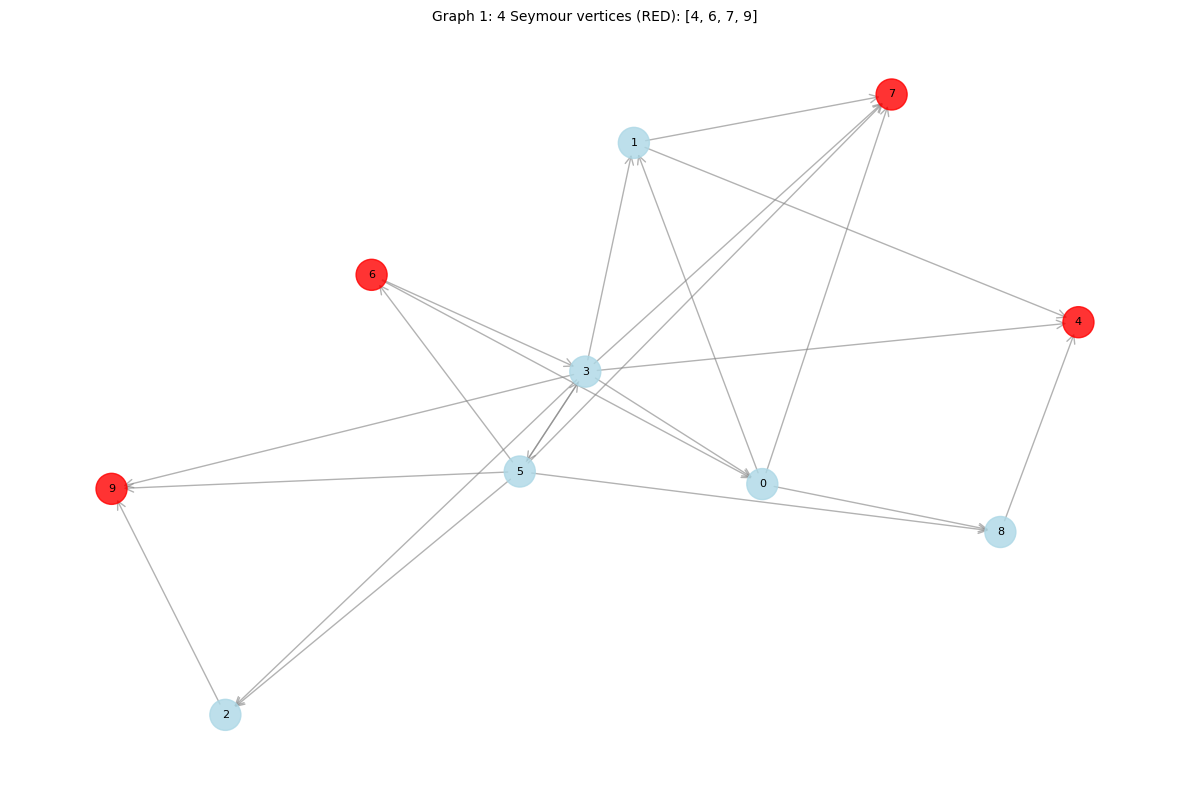

In [22]:
# TEST THE CORRECTED IMPLEMENTATION

# Generate a small test graph and verify the fix
print("=== TESTING CORRECTED IMPLEMENTATION ===")

# Create a small test graph
test_graph = generate_random_digraph_improved(10, 0.3)
seymour_vertices = get_all_seymour_vertices(test_graph)

print(f"Graph has {len(test_graph.nodes())} nodes and {len(test_graph.edges())} edges")
print(f"Seymour vertices found: {seymour_vertices}")

# Show detailed analysis for each vertex
analysis = analyze_seymour_vertices_detailed(test_graph)
for v in sorted(test_graph.nodes()):
    data = analysis[v]
    status = "✓ SEYMOUR" if data['satisfies_property'] else "✗"
    print(f"Vertex {v}: out_deg={data['out_degree']}, 2nd_neighbors={data['second_neighbor_count']}, ratio={data['ratio']:.2f} {status}")

# Draw the corrected graph
draw_graph_corrected(test_graph, 0, seymour_vertices)


=== ANALYZING LARGE GRAPHS FOR SEYMOUR VERTEX DISTRIBUTION ===
Analyzing 2000 graphs with 100 nodes, p_edge=0.05
Progress: 100/2000
Progress: 200/2000
Progress: 300/2000
Progress: 400/2000
Progress: 500/2000
Progress: 600/2000
Progress: 700/2000
Progress: 800/2000
Progress: 900/2000
Progress: 1000/2000
Progress: 1100/2000
Progress: 1200/2000
Progress: 1300/2000
Progress: 1400/2000
Progress: 1500/2000
Progress: 1600/2000
Progress: 1700/2000
Progress: 1800/2000
Progress: 1900/2000
Progress: 2000/2000

=== RESULTS ===
Graphs with at least one Seymour vertex: 2000/2000 (100.0%)
Average Seymour vertices per graph: 99.98
Max Seymour vertices in a single graph: 100
Distribution of Seymour vertex counts: {100: 1955, 99: 43, 98: 2}


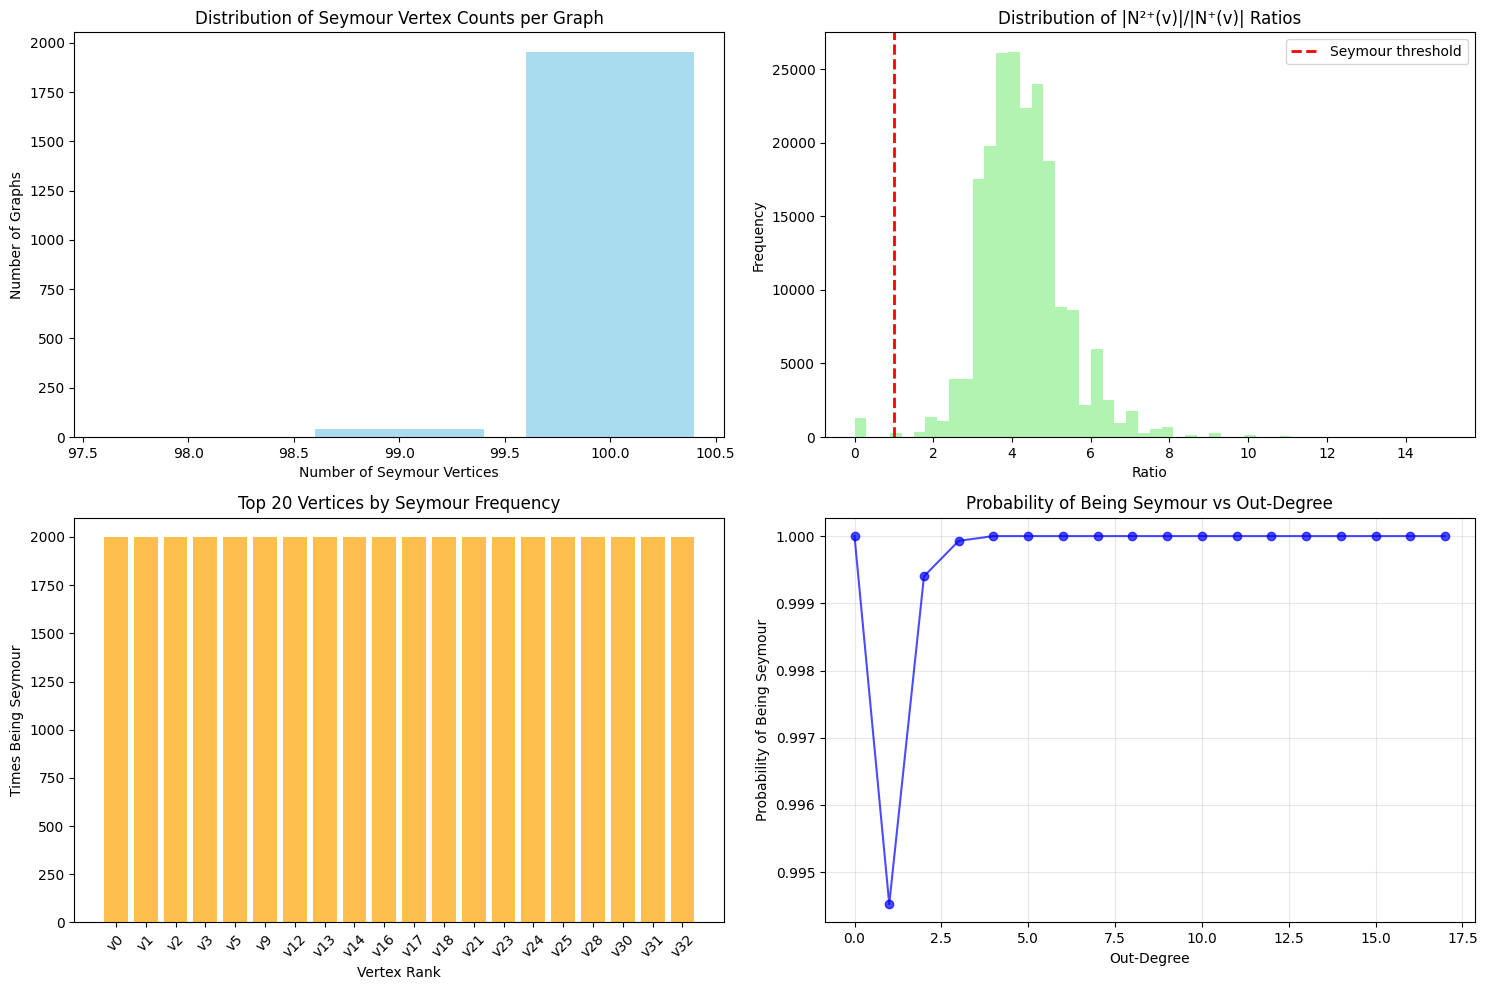


Key findings:
- 2000/2000 graphs had at least one Seymour vertex
- Most frequent Seymour vertices: [(0, 2000), (1, 2000), (2, 2000), (3, 2000), (5, 2000), (9, 2000), (12, 2000), (13, 2000), (14, 2000), (16, 2000)]
- Average ratio across all vertices: 4.241


In [23]:
# LARGE GRAPH ANALYSIS FOR DISTRIBUTION PATTERNS

print("=== ANALYZING LARGE GRAPHS FOR SEYMOUR VERTEX DISTRIBUTION ===")

# Run statistical analysis on large graphs
results = statistical_analysis_large_graphs(
    num_simulations=2000, 
    num_nodes=100, 
    p_edge=0.05
)

print(f"\nKey findings:")
# print(results)
print(f"- {results['graphs_with_seymour']}/2000 graphs had at least one Seymour vertex")
print(f"- Most frequent Seymour vertices: {results['vertex_frequency'].most_common(10)}")
print(f"- Average ratio across all vertices: {np.mean(results['all_ratios']):.3f}")


=== DEBUGGING COMPARISON ===
Debug graph edges: [(0, 1), (0, 2), (1, 3), (2, 3), (3, 4)]
Original implementation found Seymour vertices: [1, 2, 4]
Corrected implementation found Seymour vertices: [1, 2, 4]

Detailed vertex-by-vertex analysis:

=== VERTEX 0 ANALYSIS ===
Out-degree: 2
First neighbors: {1, 2}
Second neighbors: {3}
Second neighbor count: 1
Satisfies Seymour property: False
Ratio (|N²⁺(v)|/|N⁺(v)|): 0.500

=== VERTEX 1 ANALYSIS ===
Out-degree: 1
First neighbors: {3}
Second neighbors: {4}
Second neighbor count: 1
Satisfies Seymour property: True
Ratio (|N²⁺(v)|/|N⁺(v)|): 1.000

=== VERTEX 2 ANALYSIS ===
Out-degree: 1
First neighbors: {3}
Second neighbors: {4}
Second neighbor count: 1
Satisfies Seymour property: True
Ratio (|N²⁺(v)|/|N⁺(v)|): 1.000

=== VERTEX 3 ANALYSIS ===
Out-degree: 1
First neighbors: {4}
Second neighbors: set()
Second neighbor count: 0
Satisfies Seymour property: False
Ratio (|N²⁺(v)|/|N⁺(v)|): 0.000

=== VERTEX 4 ANALYSIS ===
Out-degree: 0
First neighbo

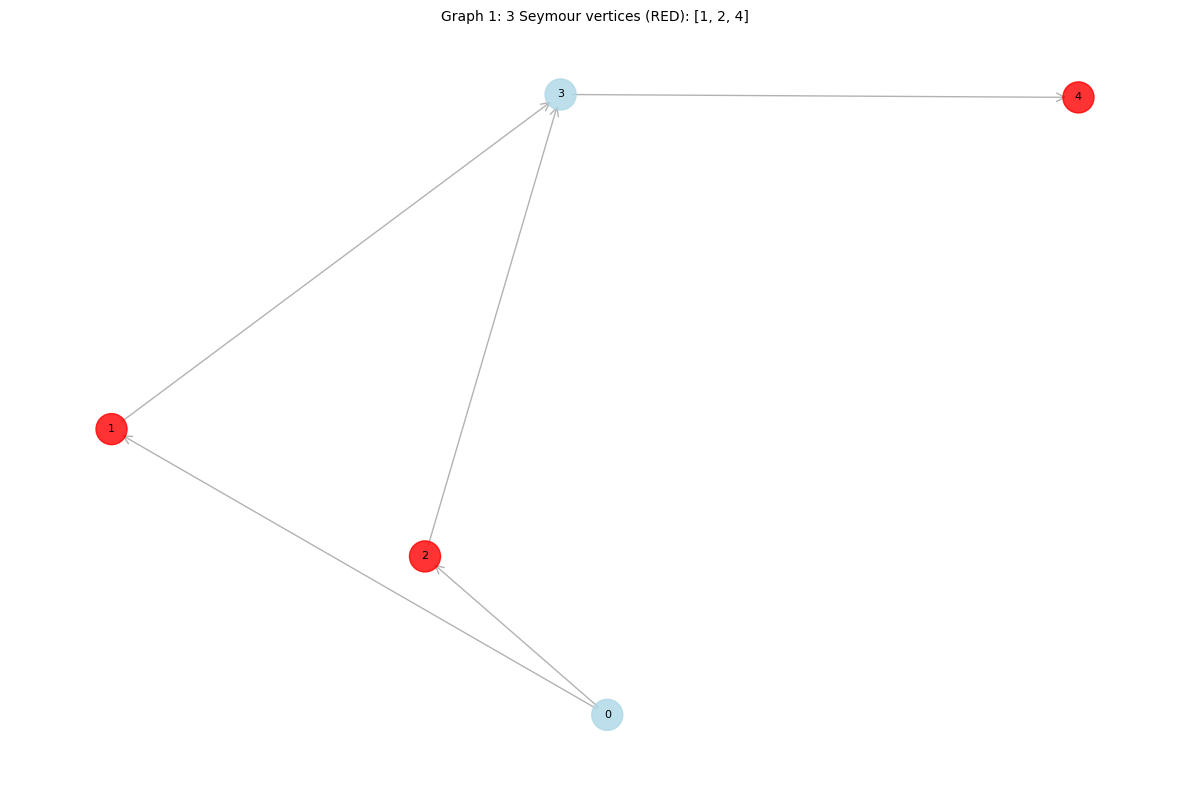


=== USAGE EXAMPLES ===
# To analyze a large graph:
large_graph = generate_random_digraph_improved(200, 0.03)
seymour_vertices = get_all_seymour_vertices(large_graph)
print(f'Found {len(seymour_vertices)} Seymour vertices out of 200')

# To debug a specific vertex:
debug_vertex_analysis(large_graph, 42)  # Analyze vertex 42


In [24]:
# DEBUGGING: COMPARISON OF IMPLEMENTATIONS

print("=== DEBUGGING COMPARISON ===")

# Test with a specific small graph to debug
G_debug = nx.DiGraph()
G_debug.add_edges_from([(0, 1), (0, 2), (1, 3), (2, 3), (3, 4)])

print("Debug graph edges:", list(G_debug.edges()))

# Test original implementation (get_all_satisfying_nodes from your Cell 3)
original_seymour = get_all_satisfying_nodes(G_debug)
print(f"Original implementation found Seymour vertices: {original_seymour}")

# Test corrected implementation
corrected_seymour = get_all_seymour_vertices(G_debug)
print(f"Corrected implementation found Seymour vertices: {corrected_seymour}")

# Detailed analysis
print("\nDetailed vertex-by-vertex analysis:")
for v in G_debug.nodes():
    debug_vertex_analysis(G_debug, v)

# Try to reproduce the coloring bug with the old draw function
print("\n=== REPRODUCING THE COLORING BUG ===")
print("The bug was in the old draw_graph function where:")
print("node_colors[satisfying_node] = 'red'")
print("This assumes nodes are indexed 0,1,2,... but NetworkX doesn't guarantee this order!")

# Show the corrected visualization
draw_graph_corrected(G_debug, 0, corrected_seymour)

# You can use this function to analyze any specific graph or vertex:
print("\n=== USAGE EXAMPLES ===")
print("# To analyze a large graph:")
print("large_graph = generate_random_digraph_improved(200, 0.03)")
print("seymour_vertices = get_all_seymour_vertices(large_graph)")
print("print(f'Found {len(seymour_vertices)} Seymour vertices out of 200')")
print("")
print("# To debug a specific vertex:")
print("debug_vertex_analysis(large_graph, 42)  # Analyze vertex 42")


In [25]:
# ANALYSIS OF CYCLES IN DIFFERENT GRAPH GENERATION METHODS

def analyze_cycles(G):
    """
    Analyze cycles of length 1 and 2 in the graph.
    """
    # Check for self-loops (1-cycles)
    self_loops = list(nx.nodes_with_selfloops(G))
    
    # Check for 2-cycles (bidirectional edges)
    two_cycles = []
    for u, v in G.edges():
        if G.has_edge(v, u) and u < v:  # u < v to avoid counting each 2-cycle twice
            two_cycles.append((u, v))
    
    return {
        'self_loops': self_loops,
        'num_self_loops': len(self_loops),
        'two_cycles': two_cycles,
        'num_two_cycles': len(two_cycles)
    }

def compare_graph_generation_methods(num_nodes=20, p_edge=0.3, num_samples=100):
    """
    Compare the two graph generation methods in terms of cycle formation.
    """
    print(f"Comparing graph generation methods with {num_nodes} nodes, p_edge={p_edge}, {num_samples} samples")
    
    # Method 1: Your original implementation
    original_cycles = {'self_loops': [], 'two_cycles': []}
    
    for _ in range(num_samples):
        G1 = generate_random_digraph(num_nodes, p_edge)  # Your original method
        cycle_info = analyze_cycles(G1)
        original_cycles['self_loops'].append(cycle_info['num_self_loops'])
        original_cycles['two_cycles'].append(cycle_info['num_two_cycles'])
    
    # Method 2: My "improved" implementation  
    improved_cycles = {'self_loops': [], 'two_cycles': []}
    
    for _ in range(num_samples):
        G2 = generate_random_digraph_improved(num_nodes, p_edge)  # My method
        cycle_info = analyze_cycles(G2)
        improved_cycles['self_loops'].append(cycle_info['num_self_loops'])
        improved_cycles['two_cycles'].append(cycle_info['num_two_cycles'])
    
    # Print results
    print("\\n=== CYCLE ANALYSIS RESULTS ===")
    print(f"ORIGINAL METHOD:")
    print(f"  Average self-loops per graph: {np.mean(original_cycles['self_loops']):.3f}")
    print(f"  Average 2-cycles per graph: {np.mean(original_cycles['two_cycles']):.3f}")
    print(f"  Max 2-cycles in a single graph: {max(original_cycles['two_cycles'])}")
    
    print(f"\\nIMPROVED METHOD:")
    print(f"  Average self-loops per graph: {np.mean(improved_cycles['self_loops']):.3f}")
    print(f"  Average 2-cycles per graph: {np.mean(improved_cycles['two_cycles']):.3f}")
    print(f"  Max 2-cycles in a single graph: {max(improved_cycles['two_cycles'])}")
    
    # Expected 2-cycle probability calculation
    expected_2cycles_improved = (num_nodes * (num_nodes - 1) / 2) * (p_edge ** 2)
    print(f"\\nEXPECTED 2-cycles (improved method): {expected_2cycles_improved:.2f}")
    print(f"ACTUAL average 2-cycles (improved method): {np.mean(improved_cycles['two_cycles']):.2f}")
    
    return original_cycles, improved_cycles

# Run the comparison
original_results, improved_results = compare_graph_generation_methods(num_nodes=15, p_edge=0.4, num_samples=200)


Comparing graph generation methods with 15 nodes, p_edge=0.4, 200 samples
\n=== CYCLE ANALYSIS RESULTS ===
ORIGINAL METHOD:
  Average self-loops per graph: 0.000
  Average 2-cycles per graph: 8.365
  Max 2-cycles in a single graph: 18
\nIMPROVED METHOD:
  Average self-loops per graph: 0.000
  Average 2-cycles per graph: 16.495
  Max 2-cycles in a single graph: 27
\nEXPECTED 2-cycles (improved method): 16.80
ACTUAL average 2-cycles (improved method): 16.50


In [26]:
# IMPACT OF 2-CYCLES ON SEYMOUR PROPERTY

def test_2cycle_impact_on_seymour():
    """
    Test how 2-cycles affect the Seymour property analysis.
    """
    print("=== TESTING 2-CYCLE IMPACT ON SEYMOUR PROPERTY ===")
    
    # Create a simple example with a 2-cycle
    G_with_2cycle = nx.DiGraph()
    G_with_2cycle.add_edges_from([(0, 1), (1, 0), (1, 2), (2, 3)])  # 0↔1 is a 2-cycle
    
    print("Graph with 2-cycle: edges =", list(G_with_2cycle.edges()))
    
    # Analyze each vertex
    analysis = analyze_seymour_vertices_detailed(G_with_2cycle)
    for v in sorted(G_with_2cycle.nodes()):
        data = analysis[v]
        print(f"Vertex {v}:")
        print(f"  First neighbors: {data['first_neighbors']}")
        print(f"  Second neighbors: {data['second_neighbors']}")
        print(f"  Out-degree: {data['out_degree']}, 2nd neighbor count: {data['second_neighbor_count']}")
        print(f"  Satisfies Seymour: {data['satisfies_property']}")
        print()
    
    # Key insight: In a 2-cycle A↔B:
    # - A has first neighbor {B}
    # - A's second neighbors come from B's out-neighbors, excluding A and B
    # - If B only points back to A, then A has no second neighbors!
    
    cycle_info = analyze_cycles(G_with_2cycle)
    print(f"2-cycles in graph: {cycle_info['two_cycles']}")
    
    # Test the "pure 2-cycle" case
    pure_2cycle = nx.DiGraph()
    pure_2cycle.add_edges_from([(0, 1), (1, 0)])
    
    print("\\n=== PURE 2-CYCLE TEST ===")
    print("Pure 2-cycle graph: edges =", list(pure_2cycle.edges()))
    
    analysis_pure = analyze_seymour_vertices_detailed(pure_2cycle)
    for v in sorted(pure_2cycle.nodes()):
        data = analysis_pure[v]
        print(f"Vertex {v}: out_deg={data['out_degree']}, 2nd_neighbors={data['second_neighbor_count']}, Seymour={data['satisfies_property']}")
    
    seymour_vertices = get_all_seymour_vertices(pure_2cycle)
    print(f"Seymour vertices in pure 2-cycle: {seymour_vertices}")
    
    # This is interesting! In a pure 2-cycle, both vertices have:
    # - Out-degree = 1 (points to the other vertex)
    # - Second neighbors = 0 (the other vertex only points back)
    # - So 0 >= 1 is False, neither satisfies Seymour property!
    
    return G_with_2cycle, pure_2cycle

def create_acyclic_graph_generator(num_nodes, p_edge):
    """
    Generate a random DAG (Directed Acyclic Graph) to test without ANY cycles.
    """
    G = nx.DiGraph()
    G.add_nodes_from(range(num_nodes))
    
    # Only add edges from lower-numbered to higher-numbered vertices
    # This guarantees no cycles of any length
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < p_edge:
                G.add_edge(i, j)
    
    return G

# Run the tests
graph_with_2cycle, pure_2cycle_graph = test_2cycle_impact_on_seymour()

# Test if DAGs (no cycles) behave differently
print("\\n=== TESTING ACYCLIC GRAPHS ===")
dag_seymour_count = 0
total_dags = 100

for i in range(total_dags):
    dag = create_acyclic_graph_generator(10, 0.3)
    if get_all_seymour_vertices(dag):
        dag_seymour_count += 1

print(f"DAGs with Seymour vertices: {dag_seymour_count}/{total_dags} ({100*dag_seymour_count/total_dags:.1f}%)")

# Compare with graphs that can have cycles
cyclic_seymour_count = 0
for i in range(total_dags):
    cyclic_graph = generate_random_digraph_improved(10, 0.3)
    if get_all_seymour_vertices(cyclic_graph):
        cyclic_seymour_count += 1

print(f"Cyclic graphs with Seymour vertices: {cyclic_seymour_count}/{total_dags} ({100*cyclic_seymour_count/total_dags:.1f}%)")


=== TESTING 2-CYCLE IMPACT ON SEYMOUR PROPERTY ===
Graph with 2-cycle: edges = [(0, 1), (1, 0), (1, 2), (2, 3)]
Vertex 0:
  First neighbors: {1}
  Second neighbors: {2}
  Out-degree: 1, 2nd neighbor count: 1
  Satisfies Seymour: True

Vertex 1:
  First neighbors: {0, 2}
  Second neighbors: {3}
  Out-degree: 2, 2nd neighbor count: 1
  Satisfies Seymour: False

Vertex 2:
  First neighbors: {3}
  Second neighbors: set()
  Out-degree: 1, 2nd neighbor count: 0
  Satisfies Seymour: False

Vertex 3:
  First neighbors: set()
  Second neighbors: set()
  Out-degree: 0, 2nd neighbor count: 0
  Satisfies Seymour: True

2-cycles in graph: [(0, 1)]
\n=== PURE 2-CYCLE TEST ===
Pure 2-cycle graph: edges = [(0, 1), (1, 0)]
Vertex 0: out_deg=1, 2nd_neighbors=0, Seymour=False
Vertex 1: out_deg=1, 2nd_neighbors=0, Seymour=False
Seymour vertices in pure 2-cycle: []
\n=== TESTING ACYCLIC GRAPHS ===
DAGs with Seymour vertices: 100/100 (100.0%)
Cyclic graphs with Seymour vertices: 100/100 (100.0%)


In [27]:
# DEMONSTRATING THE 2-CYCLE BUG IN ORIGINAL IMPLEMENTATION

def demonstrate_2cycle_bug():
    """
    Show how the original implementation can accidentally create 2-cycles.
    """
    print("=== DEMONSTRATING 2-CYCLE BUG ===")
    
    # Let's trace through a small example manually
    print("Original implementation logic:")
    print("for i in range(num_nodes):")
    print("    for j in range(num_nodes):")
    print("        if i == j: continue")
    print("        if random.random() < p_edge:")
    print("            if random.random() < 0.5:")
    print("                G.add_edge(i, j)")
    print("            else:")
    print("                G.add_edge(j, i)")
    print()
    
    print("PROBLEM: Each pair (i,j) is processed TWICE!")
    print("- When i=0, j=1: might add 0->1 OR 1->0")
    print("- When i=1, j=0: might add 1->0 OR 0->1")
    print("- Result: Could get BOTH 0->1 AND 1->0 = 2-cycle!")
    print()
    
    # Test this empirically
    random.seed(42)  # For reproducible results
    test_graphs = []
    
    for trial in range(20):
        G = nx.DiGraph()
        G.add_nodes_from(range(4))  # Small graph for easier analysis
        
        # Simulate your original logic with high p_edge to see 2-cycles
        p_edge = 0.8
        for i in range(4):
            for j in range(4):
                if i == j:
                    continue
                if random.random() < p_edge:
                    if random.random() < 0.5:
                        G.add_edge(i, j)
                    else:
                        G.add_edge(j, i)
        
        cycle_info = analyze_cycles(G)
        if cycle_info['num_two_cycles'] > 0:
            test_graphs.append((G, cycle_info))
            print(f"Trial {trial}: Found 2-cycles: {cycle_info['two_cycles']}")
            print(f"  All edges: {list(G.edges())}")
    
    print(f"\\nFound 2-cycles in {len(test_graphs)}/20 trials")
    return test_graphs

def generate_random_digraph_fixed(num_nodes, p_edge):
    """
    CORRECTED version that prevents 2-cycles as intended.
    Process each unordered pair {i,j} only once.
    """
    G = nx.DiGraph()
    G.add_nodes_from(range(num_nodes))
    
    # Process each unordered pair only once
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):  # j > i ensures each pair processed once
            if random.random() < p_edge:
                if random.random() < 0.5:
                    G.add_edge(i, j)  # i -> j
                else:
                    G.add_edge(j, i)  # j -> i
                # But NOT both!
    
    return G

def generate_random_digraph_alternative(num_nodes, p_edge):
    """
    Alternative: Use a set to track processed pairs and avoid 2-cycles.
    """
    G = nx.DiGraph()
    G.add_nodes_from(range(num_nodes))
    processed_pairs = set()
    
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i == j:
                continue
            
            # Create canonical pair representation (smaller first)
            pair = (min(i, j), max(i, j))
            
            if pair not in processed_pairs and random.random() < p_edge:
                processed_pairs.add(pair)
                if random.random() < 0.5:
                    G.add_edge(i, j)
                else:
                    G.add_edge(j, i)
    
    return G

# Test the bug
examples_with_2cycles = demonstrate_2cycle_bug()

print("\\n=== TESTING CORRECTED IMPLEMENTATIONS ===")

# Test that corrected versions don't create 2-cycles
for method_name, method_func in [
    ("Fixed method", generate_random_digraph_fixed),
    ("Alternative method", generate_random_digraph_alternative)
]:
    two_cycle_count = 0
    total_tests = 100
    
    for _ in range(total_tests):
        G = method_func(10, 0.5)
        cycle_info = analyze_cycles(G)
        two_cycle_count += cycle_info['num_two_cycles']
    
    print(f"{method_name}: Found {two_cycle_count} total 2-cycles in {total_tests} graphs")
    if two_cycle_count == 0:
        print(f"  ✅ {method_name} successfully prevents 2-cycles!")
    else:
        print(f"  ❌ {method_name} still creates 2-cycles")


=== DEMONSTRATING 2-CYCLE BUG ===
Original implementation logic:
for i in range(num_nodes):
    for j in range(num_nodes):
        if i == j: continue
        if random.random() < p_edge:
            if random.random() < 0.5:
                G.add_edge(i, j)
            else:
                G.add_edge(j, i)

PROBLEM: Each pair (i,j) is processed TWICE!
- When i=0, j=1: might add 0->1 OR 1->0
- When i=1, j=0: might add 1->0 OR 0->1
- Result: Could get BOTH 0->1 AND 1->0 = 2-cycle!

Trial 0: Found 2-cycles: [(0, 2), (0, 3), (2, 3)]
  All edges: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 0), (2, 3), (3, 0), (3, 2)]
Trial 1: Found 2-cycles: [(0, 1), (0, 3)]
  All edges: [(0, 2), (0, 1), (0, 3), (1, 0), (2, 1), (3, 0), (3, 2), (3, 1)]
Trial 2: Found 2-cycles: [(0, 1), (0, 2), (1, 3)]
  All edges: [(0, 1), (0, 3), (0, 2), (1, 0), (1, 3), (2, 0), (2, 1), (3, 1), (3, 2)]
Trial 3: Found 2-cycles: [(0, 2), (1, 2)]
  All edges: [(0, 1), (0, 2), (1, 2), (2, 1), (2, 0), (3, 1), (3, 2)]
Trial 4: 

In [28]:
# COMPARING SEYMOUR RESULTS: BUGGY vs FIXED IMPLEMENTATIONS

def compare_seymour_results():
    """
    Compare Seymour vertex distributions between buggy and fixed implementations.
    """
    print("=== COMPARING SEYMOUR RESULTS ===")
    
    num_trials = 500
    results = {
        'original_buggy': [],
        'fixed_no_2cycles': []
    }
    
    for i in range(num_trials):
        if (i + 1) % 100 == 0:
            print(f"Progress: {i+1}/{num_trials}")
        
        # Test original (potentially buggy) implementation
        G_buggy = generate_random_digraph(15, 0.3)
        seymour_buggy = get_all_seymour_vertices(G_buggy)
        cycle_info_buggy = analyze_cycles(G_buggy)
        results['original_buggy'].append({
            'num_seymour': len(seymour_buggy),
            'num_2cycles': cycle_info_buggy['num_two_cycles'],
            'has_seymour': len(seymour_buggy) > 0
        })
        
        # Test fixed implementation
        G_fixed = generate_random_digraph_fixed(15, 0.3)
        seymour_fixed = get_all_seymour_vertices(G_fixed)
        cycle_info_fixed = analyze_cycles(G_fixed)
        results['fixed_no_2cycles'].append({
            'num_seymour': len(seymour_fixed),
            'num_2cycles': cycle_info_fixed['num_two_cycles'],
            'has_seymour': len(seymour_fixed) > 0
        })
    
    # Analyze results
    print("\\n=== RESULTS COMPARISON ===")
    
    for method_name, data in results.items():
        seymour_counts = [d['num_seymour'] for d in data]
        cycle_counts = [d['num_2cycles'] for d in data]
        success_rate = sum(d['has_seymour'] for d in data) / len(data)
        
        print(f"\\n{method_name.upper()}:")
        print(f"  Graphs with Seymour vertices: {sum(d['has_seymour'] for d in data)}/{len(data)} ({100*success_rate:.1f}%)")
        print(f"  Average Seymour vertices per graph: {np.mean(seymour_counts):.2f}")
        print(f"  Average 2-cycles per graph: {np.mean(cycle_counts):.2f}")
        print(f"  Max 2-cycles in a single graph: {max(cycle_counts)}")
        
        # Find counterexamples (graphs with no Seymour vertices)
        counterexamples = [i for i, d in enumerate(data) if not d['has_seymour']]
        print(f"  Potential counterexamples: {len(counterexamples)}")
        
        if counterexamples:
            print(f"  First few counterexample indices: {counterexamples[:5]}")
    
    return results

# Run the comparison
comparison_results = compare_seymour_results()

# Key insight: If the original method creates 2-cycles and still finds Seymour vertices in every graph,
# then the fixed method (without 2-cycles) should also find Seymour vertices in every graph.
# This would confirm that 2-cycles are not necessary for the Seymour property to hold.

print("\\n=== KEY INSIGHT ===")
print("If your goal is to find counterexamples to Seymour's theorem,")
print("you should use the FIXED implementation (no 2-cycles) because:")
print("1. It matches your intended graph model")
print("2. 2-cycles might be 'helping' satisfy the Seymour property artificially")
print("3. Graphs without 2-cycles are more likely to reveal true counterexamples")


=== COMPARING SEYMOUR RESULTS ===
Progress: 100/500
Progress: 200/500
Progress: 300/500
Progress: 400/500
Progress: 500/500
\n=== RESULTS COMPARISON ===
\nORIGINAL_BUGGY:
  Graphs with Seymour vertices: 500/500 (100.0%)
  Average Seymour vertices per graph: 14.15
  Average 2-cycles per graph: 4.64
  Max 2-cycles in a single graph: 11
  Potential counterexamples: 0
\nFIXED_NO_2CYCLES:
  Graphs with Seymour vertices: 500/500 (100.0%)
  Average Seymour vertices per graph: 13.00
  Average 2-cycles per graph: 0.00
  Max 2-cycles in a single graph: 0
  Potential counterexamples: 0
\n=== KEY INSIGHT ===
If your goal is to find counterexamples to Seymour's theorem,
you should use the FIXED implementation (no 2-cycles) because:
1. It matches your intended graph model
2. 2-cycles might be 'helping' satisfy the Seymour property artificially
3. Graphs without 2-cycles are more likely to reveal true counterexamples


Generating 30 graphs with 12 nodes, p_edge=0.25


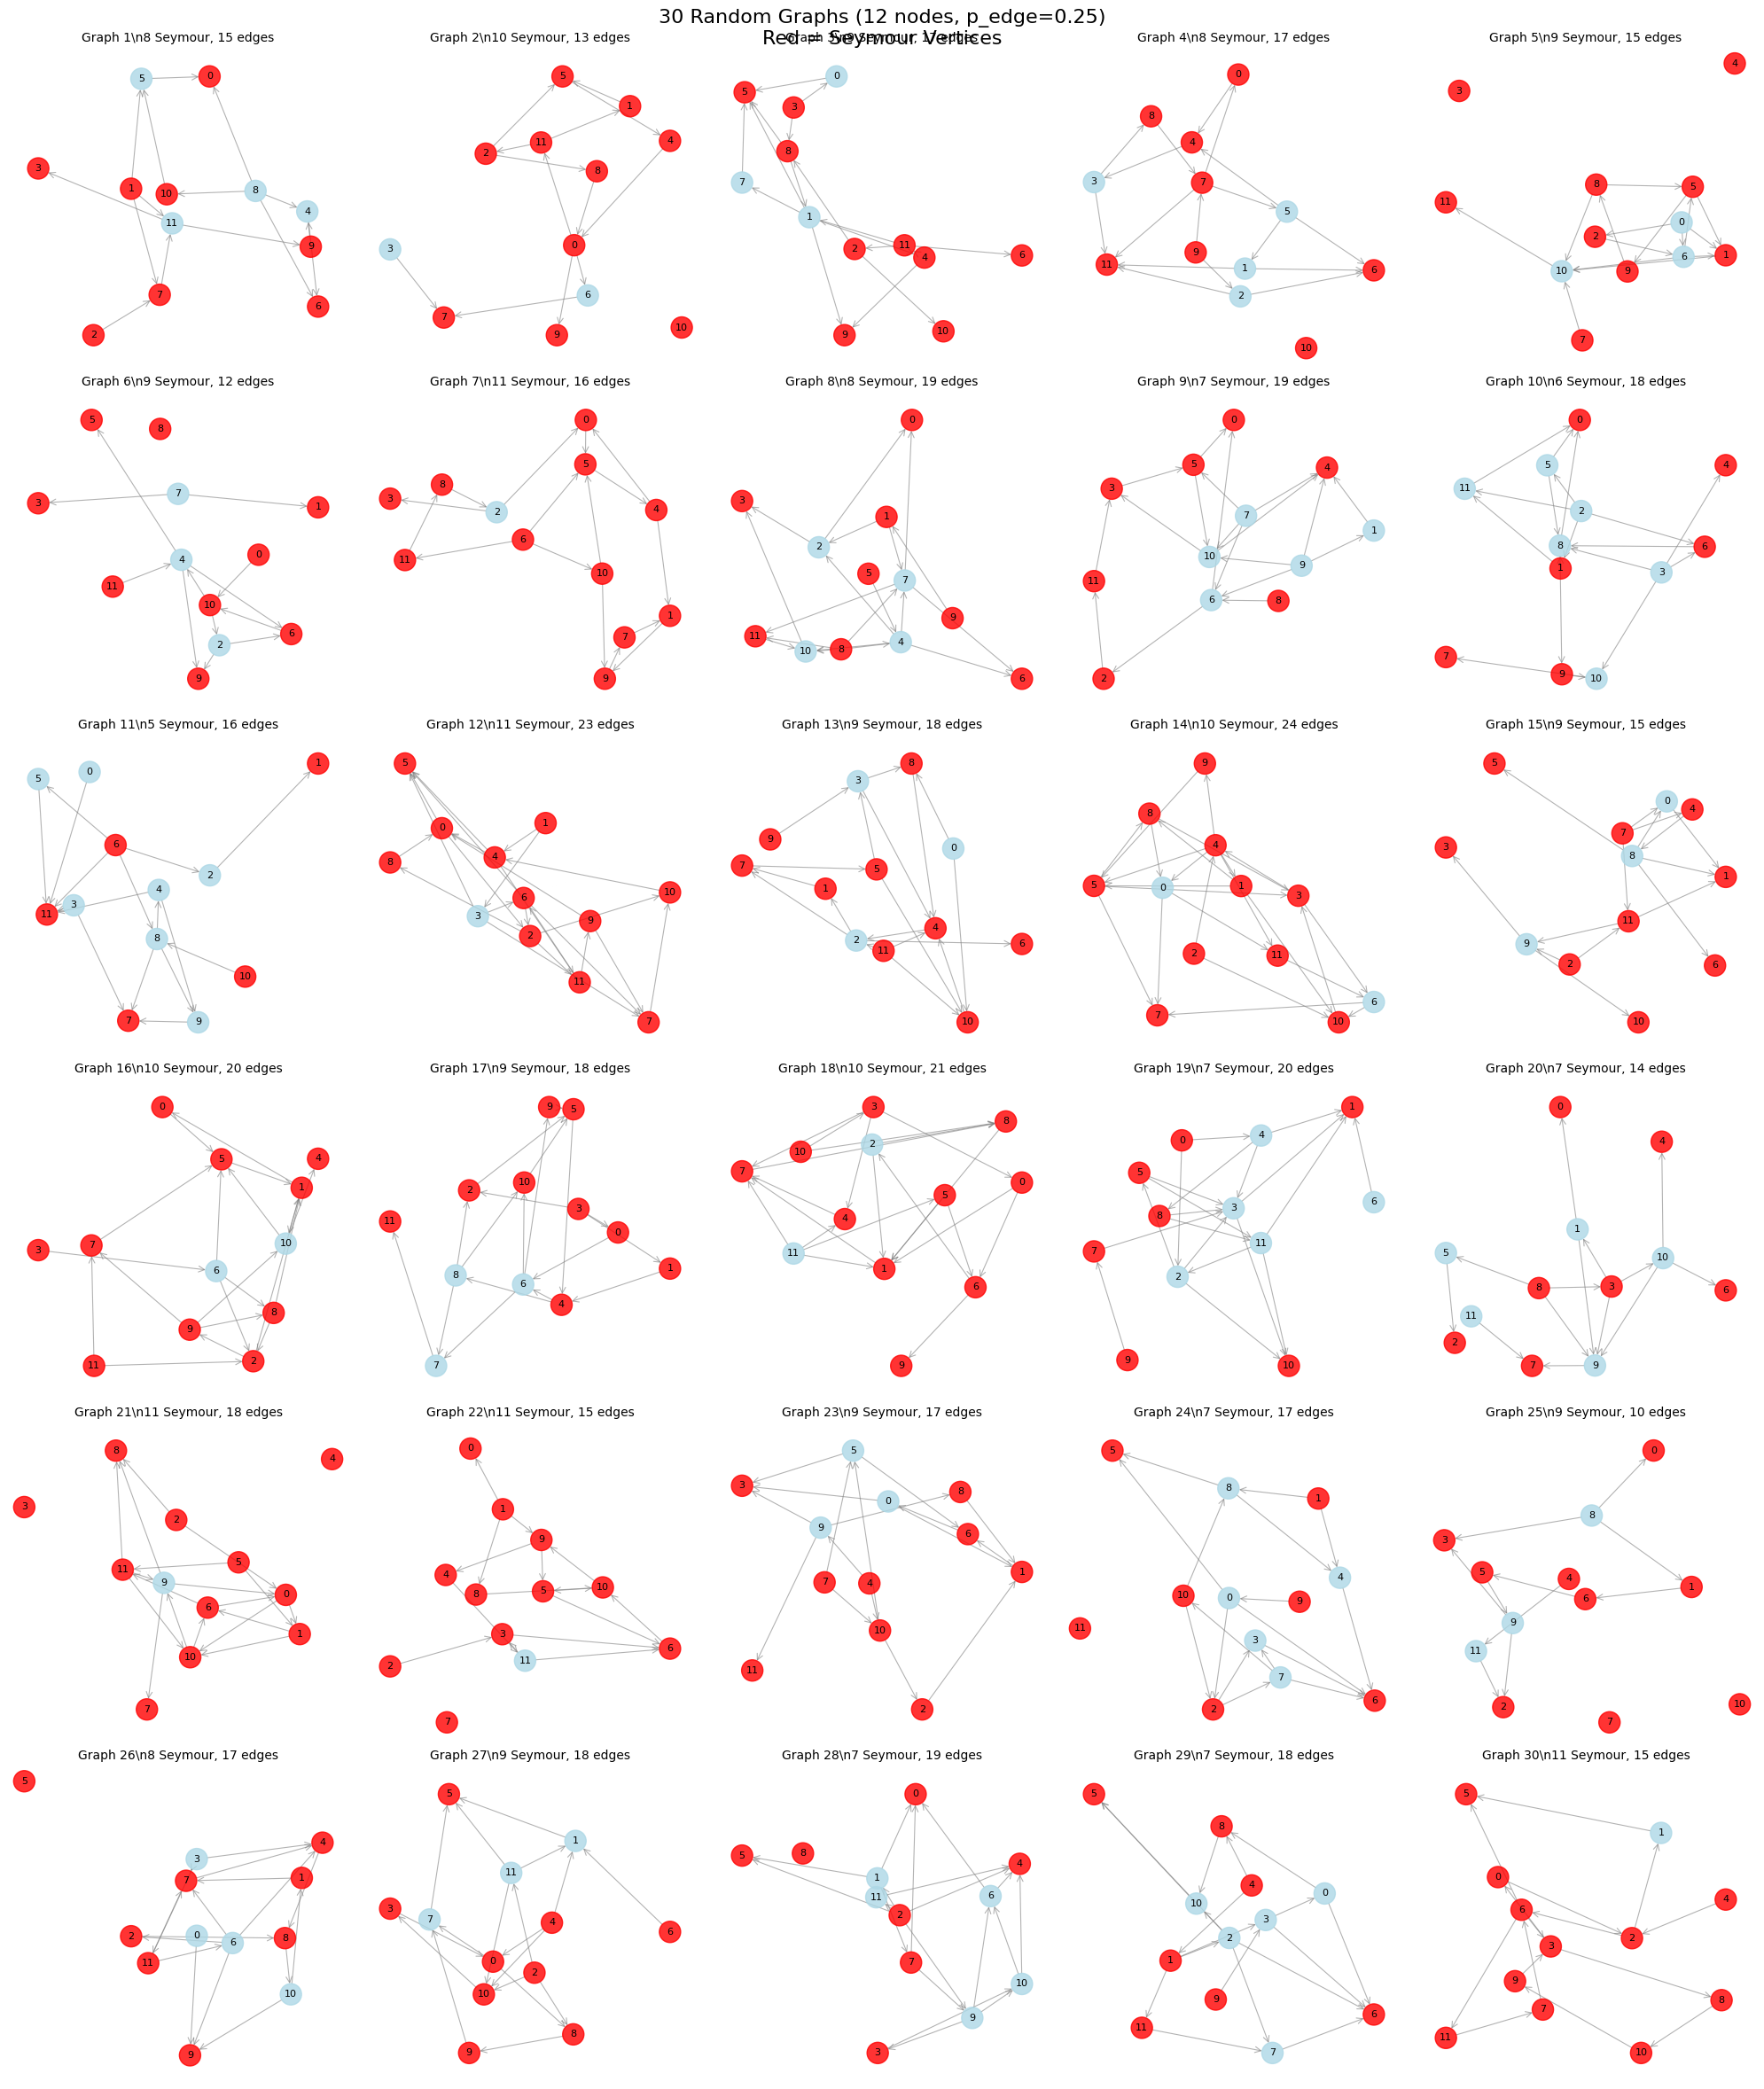

\n============================================================
SUMMARY STATISTICS
Graphs with at least one Seymour vertex: 30/30 (100.0%)
Average Seymour vertices per graph: 8.70
Average edges per graph: 17.1
Seymour vertex distribution: {8: 4, 10: 4, 9: 9, 11: 5, 7: 6, 6: 1, 5: 1}
\n============================================================
DETAILED RESULTS BY GRAPH
Graph | Edges | Seymour Count | Seymour Vertices
------------------------------------------------------------
    1 |    15 |             8 | [0, 1, 2, 3, 6, 7, 9, 10]
    2 |    13 |            10 | [0, 1, 2, 4, 5, 7, 8, 9, 10, 11]
    3 |    17 |             9 | [2, 3, 4, 5, 6, 8, 9, 10, 11]
    4 |    17 |             8 | [0, 4, 6, 7, 8, 9, 10, 11]
    5 |    15 |             9 | [1, 2, 3, 4, 5, 7, 8, 9, 11]
    6 |    12 |             9 | [0, 1, 3, 5, 6, 8, 9, 10, 11]
    7 |    16 |            11 | [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    8 |    19 |             8 | [0, 1, 3, 5, 6, 8, 9, 11]
    9 |    19 |          

In [29]:
# GENERATE AND DISPLAY 30 GRAPHS WITH SEYMOUR VERTICES HIGHLIGHTED

def generate_and_display_30_graphs(num_nodes=12, p_edge=0.25):
    """
    Generate 30 graphs with 12 nodes each and display them all with Seymour vertices in red.
    """
    print(f"Generating 30 graphs with {num_nodes} nodes, p_edge={p_edge}")
    
    # Create a large figure to hold all 30 graphs
    fig, axes = plt.subplots(6, 5, figsize=(20, 24))  # 6 rows x 5 columns = 30 subplots
    fig.suptitle(f'30 Random Graphs ({num_nodes} nodes, p_edge={p_edge})\nRed = Seymour Vertices', fontsize=16)
    
    # Flatten axes array for easier indexing
    axes_flat = axes.flatten()
    
    # Store results for summary
    results = []
    
    for i in range(30):
        # Generate graph using the FIXED implementation (no 2-cycles)
        G = generate_random_digraph_fixed(num_nodes, p_edge)
        
        # Find Seymour vertices
        seymour_vertices = get_all_seymour_vertices(G)
        
        # Store results
        results.append({
            'graph_id': i + 1,
            'num_edges': len(G.edges()),
            'seymour_vertices': seymour_vertices,
            'num_seymour': len(seymour_vertices)
        })
        
        # Set up the subplot
        ax = axes_flat[i]
        
        # Create node colors - red for Seymour, lightblue for others
        node_colors = []
        for node in G.nodes():
            if node in seymour_vertices:
                node_colors.append('red')
            else:
                node_colors.append('lightblue')
        
        # Create layout for this graph
        pos = nx.spring_layout(G, k=0.8, iterations=50, seed=42)  # Fixed seed for consistent layout
        
        # Draw the graph
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=300, ax=ax, alpha=0.8)
        nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=12, edge_color='gray', ax=ax, alpha=0.6, width=0.8)
        nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', ax=ax)
        
        # Set title for this subplot
        title = f"Graph {i+1}\\n{len(seymour_vertices)} Seymour, {len(G.edges())} edges"
        ax.set_title(title, fontsize=10)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\\n" + "="*60)
    print("SUMMARY STATISTICS")
    print("="*60)
    
    num_seymour_counts = [r['num_seymour'] for r in results]
    edge_counts = [r['num_edges'] for r in results]
    graphs_with_seymour = sum(1 for r in results if r['num_seymour'] > 0)
    
    print(f"Graphs with at least one Seymour vertex: {graphs_with_seymour}/30 ({100*graphs_with_seymour/30:.1f}%)")
    print(f"Average Seymour vertices per graph: {np.mean(num_seymour_counts):.2f}")
    print(f"Average edges per graph: {np.mean(edge_counts):.1f}")
    print(f"Seymour vertex distribution: {dict(Counter(num_seymour_counts))}")
    
    # Show detailed results for each graph
    print("\\n" + "="*60)
    print("DETAILED RESULTS BY GRAPH")
    print("="*60)
    print("Graph | Edges | Seymour Count | Seymour Vertices")
    print("-" * 60)
    
    for r in results:
        seymour_str = str(r['seymour_vertices']) if r['seymour_vertices'] else "None"
        print(f"{r['graph_id']:5d} | {r['num_edges']:5d} | {r['num_seymour']:13d} | {seymour_str}")
    
    # Check for potential counterexamples
    counterexamples = [r for r in results if r['num_seymour'] == 0]
    if counterexamples:
        print(f"\\n🚨 POTENTIAL COUNTEREXAMPLES FOUND: {len(counterexamples)} graphs with NO Seymour vertices!")
        for ce in counterexamples:
            print(f"   Graph {ce['graph_id']}: {ce['num_edges']} edges, 0 Seymour vertices")
    else:
        print("\\n✅ All graphs have at least one Seymour vertex (consistent with Seymour's theorem)")
    
    return results

# Generate and display the graphs
graph_results = generate_and_display_30_graphs(num_nodes=12, p_edge=0.25)


In [30]:
# GENERAL FUNCTION FOR GRAPH GENERATION AND VISUALIZATION

def generate_random_digraph_general(num_nodes, p_edge, direction_prob=0.5):
    """
    Generate a random directed graph with customizable direction probability.
    
    Parameters:
    - num_nodes: Number of nodes in the graph
    - p_edge: Probability that an edge exists between any pair of nodes
    - direction_prob: Probability of choosing i->j vs j->i (default 0.5 for equal probability)
    """
    G = nx.DiGraph()
    G.add_nodes_from(range(num_nodes))
    
    # Process each unordered pair only once to avoid 2-cycles
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):  # j > i ensures each pair processed once
            if random.random() < p_edge:
                if random.random() < direction_prob:
                    G.add_edge(i, j)  # i -> j
                else:
                    G.add_edge(j, i)  # j -> i
    
    return G

def generate_and_display_graphs(N, M, p, e=0.5):
    """
    Generate and display N graphs with M nodes each, highlighting Seymour vertices.
    
    Parameters:
    - N: Number of graphs to generate
    - M: Number of nodes per graph
    - p: Probability of an edge being included between any pair of nodes
    - e: Probability of edge direction (i->j vs j->i), default 0.5 (50/50)
    """
    print(f"Generating {N} graphs with {M} nodes each")
    print(f"Edge probability: {p}, Direction probability: {e}")
    
    # Calculate optimal subplot arrangement
    if N == 1:
        rows, cols = 1, 1
    elif N <= 4:
        rows, cols = 2, 2
    elif N <= 9:
        rows, cols = 3, 3
    elif N <= 16:
        rows, cols = 4, 4
    elif N <= 25:
        rows, cols = 5, 5
    elif N <= 36:
        rows, cols = 6, 6
    else:
        # For larger N, calculate optimal rectangular arrangement
        cols = int(np.ceil(np.sqrt(N)))
        rows = int(np.ceil(N / cols))
    
    # Adjust figure size based on number of graphs
    fig_width = min(20, cols * 4)
    fig_height = min(24, rows * 4)
    
    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))
    fig.suptitle(f'{N} Random Graphs ({M} nodes, p={p}, direction_prob={e})\\nRed = Seymour Vertices', fontsize=14)
    
    # Handle single subplot case
    if N == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if rows * cols > 1 else [axes]
    
    # Store results for summary
    results = []
    
    for i in range(N):
        # Generate graph using the general implementation
        G = generate_random_digraph_general(M, p, e)
        
        # Find Seymour vertices
        seymour_vertices = get_all_seymour_vertices(G)
        
        # Check for 2-cycles (should be 0 with our implementation)
        cycle_info = analyze_cycles(G)
        
        # Store results
        results.append({
            'graph_id': i + 1,
            'num_edges': len(G.edges()),
            'seymour_vertices': seymour_vertices,
            'num_seymour': len(seymour_vertices),
            'num_2cycles': cycle_info['num_two_cycles']
        })
        
        # Set up the subplot
        ax = axes[i]
        
        # Create node colors - red for Seymour, lightblue for others
        node_colors = []
        for node in G.nodes():
            if node in seymour_vertices:
                node_colors.append('red')
            else:
                node_colors.append('lightblue')
        
        # Create layout for this graph (adjust based on graph size)
        if M <= 15:
            node_size = max(200, 400 - M * 10)  # Smaller nodes for larger graphs
            font_size = max(6, 10 - M // 3)
        else:
            node_size = 100
            font_size = 6
        
        pos = nx.spring_layout(G, k=1.0/np.sqrt(M), iterations=50, seed=42)
        
        # Draw the graph
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_size, ax=ax, alpha=0.8)
        nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=8, edge_color='gray', ax=ax, alpha=0.6, width=0.8)
        
        # Only show labels for smaller graphs
        if M <= 20:
            nx.draw_networkx_labels(G, pos, font_size=font_size, font_color='black', ax=ax)
        
        # Set title for this subplot
        title = f"Graph {i+1}\\n{len(seymour_vertices)} Seymour, {len(G.edges())} edges"
        ax.set_title(title, fontsize=max(8, 12 - N//10))
        ax.axis('off')
    
    # Hide unused subplots
    for i in range(N, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\\n" + "="*70)
    print("SUMMARY STATISTICS")
    print("="*70)
    
    num_seymour_counts = [r['num_seymour'] for r in results]
    edge_counts = [r['num_edges'] for r in results]
    cycle_counts = [r['num_2cycles'] for r in results]
    graphs_with_seymour = sum(1 for r in results if r['num_seymour'] > 0)
    
    print(f"Graphs with at least one Seymour vertex: {graphs_with_seymour}/{N} ({100*graphs_with_seymour/N:.1f}%)")
    print(f"Average Seymour vertices per graph: {np.mean(num_seymour_counts):.2f}")
    print(f"Average edges per graph: {np.mean(edge_counts):.1f}")
    print(f"Total 2-cycles found: {sum(cycle_counts)} (should be 0)")
    print(f"Seymour vertex distribution: {dict(Counter(num_seymour_counts))}")
    
    # Show detailed results for smaller numbers of graphs
    if N <= 50:
        print("\\n" + "="*70)
        print("DETAILED RESULTS BY GRAPH")
        print("="*70)
        print("Graph | Edges | Seymour Count | 2-Cycles | Seymour Vertices")
        print("-" * 70)
        
        for r in results:
            seymour_str = str(r['seymour_vertices']) if r['seymour_vertices'] else "None"
            if len(seymour_str) > 30:  # Truncate long lists
                seymour_str = seymour_str[:27] + "..."
            print(f"{r['graph_id']:5d} | {r['num_edges']:5d} | {r['num_seymour']:13d} | {r['num_2cycles']:8d} | {seymour_str}")
    
    # Check for potential counterexamples
    counterexamples = [r for r in results if r['num_seymour'] == 0]
    if counterexamples:
        print(f"\\n🚨 POTENTIAL COUNTEREXAMPLES FOUND: {len(counterexamples)} graphs with NO Seymour vertices!")
        for ce in counterexamples:
            print(f"   Graph {ce['graph_id']}: {ce['num_edges']} edges, 0 Seymour vertices")
    else:
        print("\\n✅ All graphs have at least one Seymour vertex (consistent with Seymour's theorem)")
    
    # Verify no 2-cycles
    total_2cycles = sum(cycle_counts)
    if total_2cycles == 0:
        print("✅ No 2-cycles found (implementation working correctly)")
    else:
        print(f"⚠️  Found {total_2cycles} 2-cycles (implementation bug!)")
    
    return results

# Example usage:
print("=== EXAMPLE USAGE ===")
print("generate_and_display_graphs(N=30, M=12, p=0.25, e=0.5)")
print("  - Generates 30 graphs")
print("  - Each graph has 12 nodes") 
print("  - 25% chance of edge between any pair")
print("  - 50% chance of either direction")
print()
print("generate_and_display_graphs(N=16, M=8, p=0.4, e=0.7)")
print("  - Generates 16 graphs")
print("  - Each graph has 8 nodes")
print("  - 40% chance of edge between any pair") 
print("  - 70% chance of i->j, 30% chance of j->i")


=== EXAMPLE USAGE ===
generate_and_display_graphs(N=30, M=12, p=0.25, e=0.5)
  - Generates 30 graphs
  - Each graph has 12 nodes
  - 25% chance of edge between any pair
  - 50% chance of either direction

generate_and_display_graphs(N=16, M=8, p=0.4, e=0.7)
  - Generates 16 graphs
  - Each graph has 8 nodes
  - 40% chance of edge between any pair
  - 70% chance of i->j, 30% chance of j->i


Generating 6 graphs with 8 nodes each
Edge probability: 0.6, Direction probability: 0.5


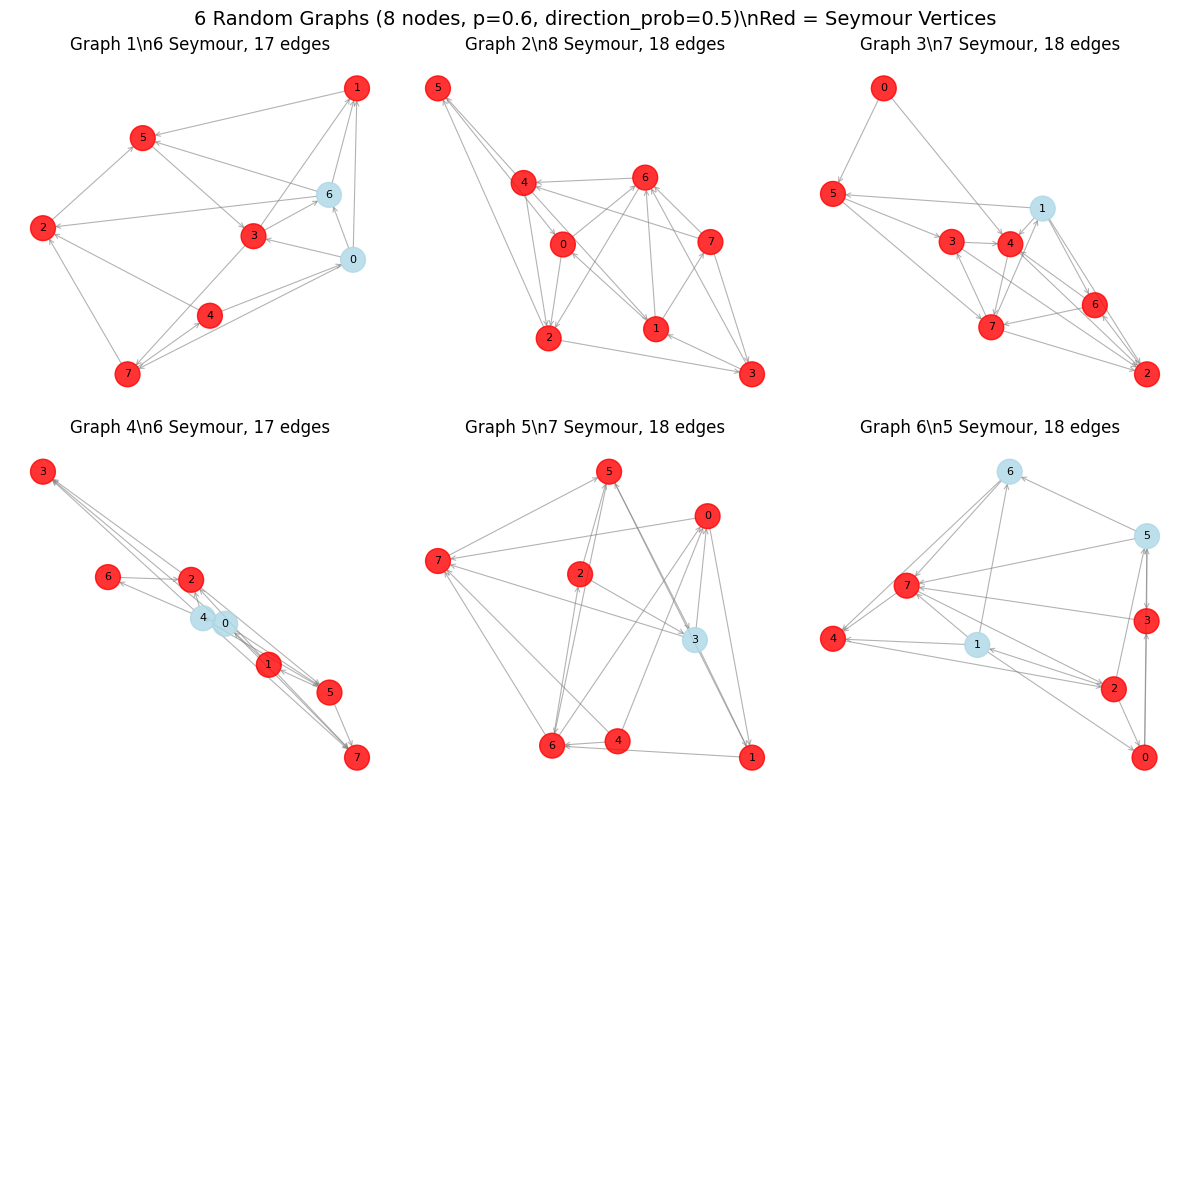

\n======================================================================
SUMMARY STATISTICS
Graphs with at least one Seymour vertex: 6/6 (100.0%)
Average Seymour vertices per graph: 6.50
Average edges per graph: 17.7
Total 2-cycles found: 0 (should be 0)
Seymour vertex distribution: {6: 2, 8: 1, 7: 2, 5: 1}
\n======================================================================
DETAILED RESULTS BY GRAPH
Graph | Edges | Seymour Count | 2-Cycles | Seymour Vertices
----------------------------------------------------------------------
    1 |    17 |             6 |        0 | [1, 2, 3, 4, 5, 7]
    2 |    18 |             8 |        0 | [0, 1, 2, 3, 4, 5, 6, 7]
    3 |    18 |             7 |        0 | [0, 2, 3, 4, 5, 6, 7]
    4 |    17 |             6 |        0 | [1, 2, 3, 5, 6, 7]
    5 |    18 |             7 |        0 | [0, 1, 2, 4, 5, 6, 7]
    6 |    18 |             5 |        0 | [0, 2, 3, 4, 7]
\n✅ All graphs have at least one Seymour vertex (consistent with Seymour's theor

[{'graph_id': 1,
  'num_edges': 17,
  'seymour_vertices': [1, 2, 3, 4, 5, 7],
  'num_seymour': 6,
  'num_2cycles': 0},
 {'graph_id': 2,
  'num_edges': 18,
  'seymour_vertices': [0, 1, 2, 3, 4, 5, 6, 7],
  'num_seymour': 8,
  'num_2cycles': 0},
 {'graph_id': 3,
  'num_edges': 18,
  'seymour_vertices': [0, 2, 3, 4, 5, 6, 7],
  'num_seymour': 7,
  'num_2cycles': 0},
 {'graph_id': 4,
  'num_edges': 17,
  'seymour_vertices': [1, 2, 3, 5, 6, 7],
  'num_seymour': 6,
  'num_2cycles': 0},
 {'graph_id': 5,
  'num_edges': 18,
  'seymour_vertices': [0, 1, 2, 4, 5, 6, 7],
  'num_seymour': 7,
  'num_2cycles': 0},
 {'graph_id': 6,
  'num_edges': 18,
  'seymour_vertices': [0, 2, 3, 4, 7],
  'num_seymour': 5,
  'num_2cycles': 0}]

In [113]:
generate_and_display_graphs(N=6, M=8, p=0.6, e=0.5)

Generating 30 graphs with 12 nodes each
Edge probability: 0.25, Direction probability: 0.5


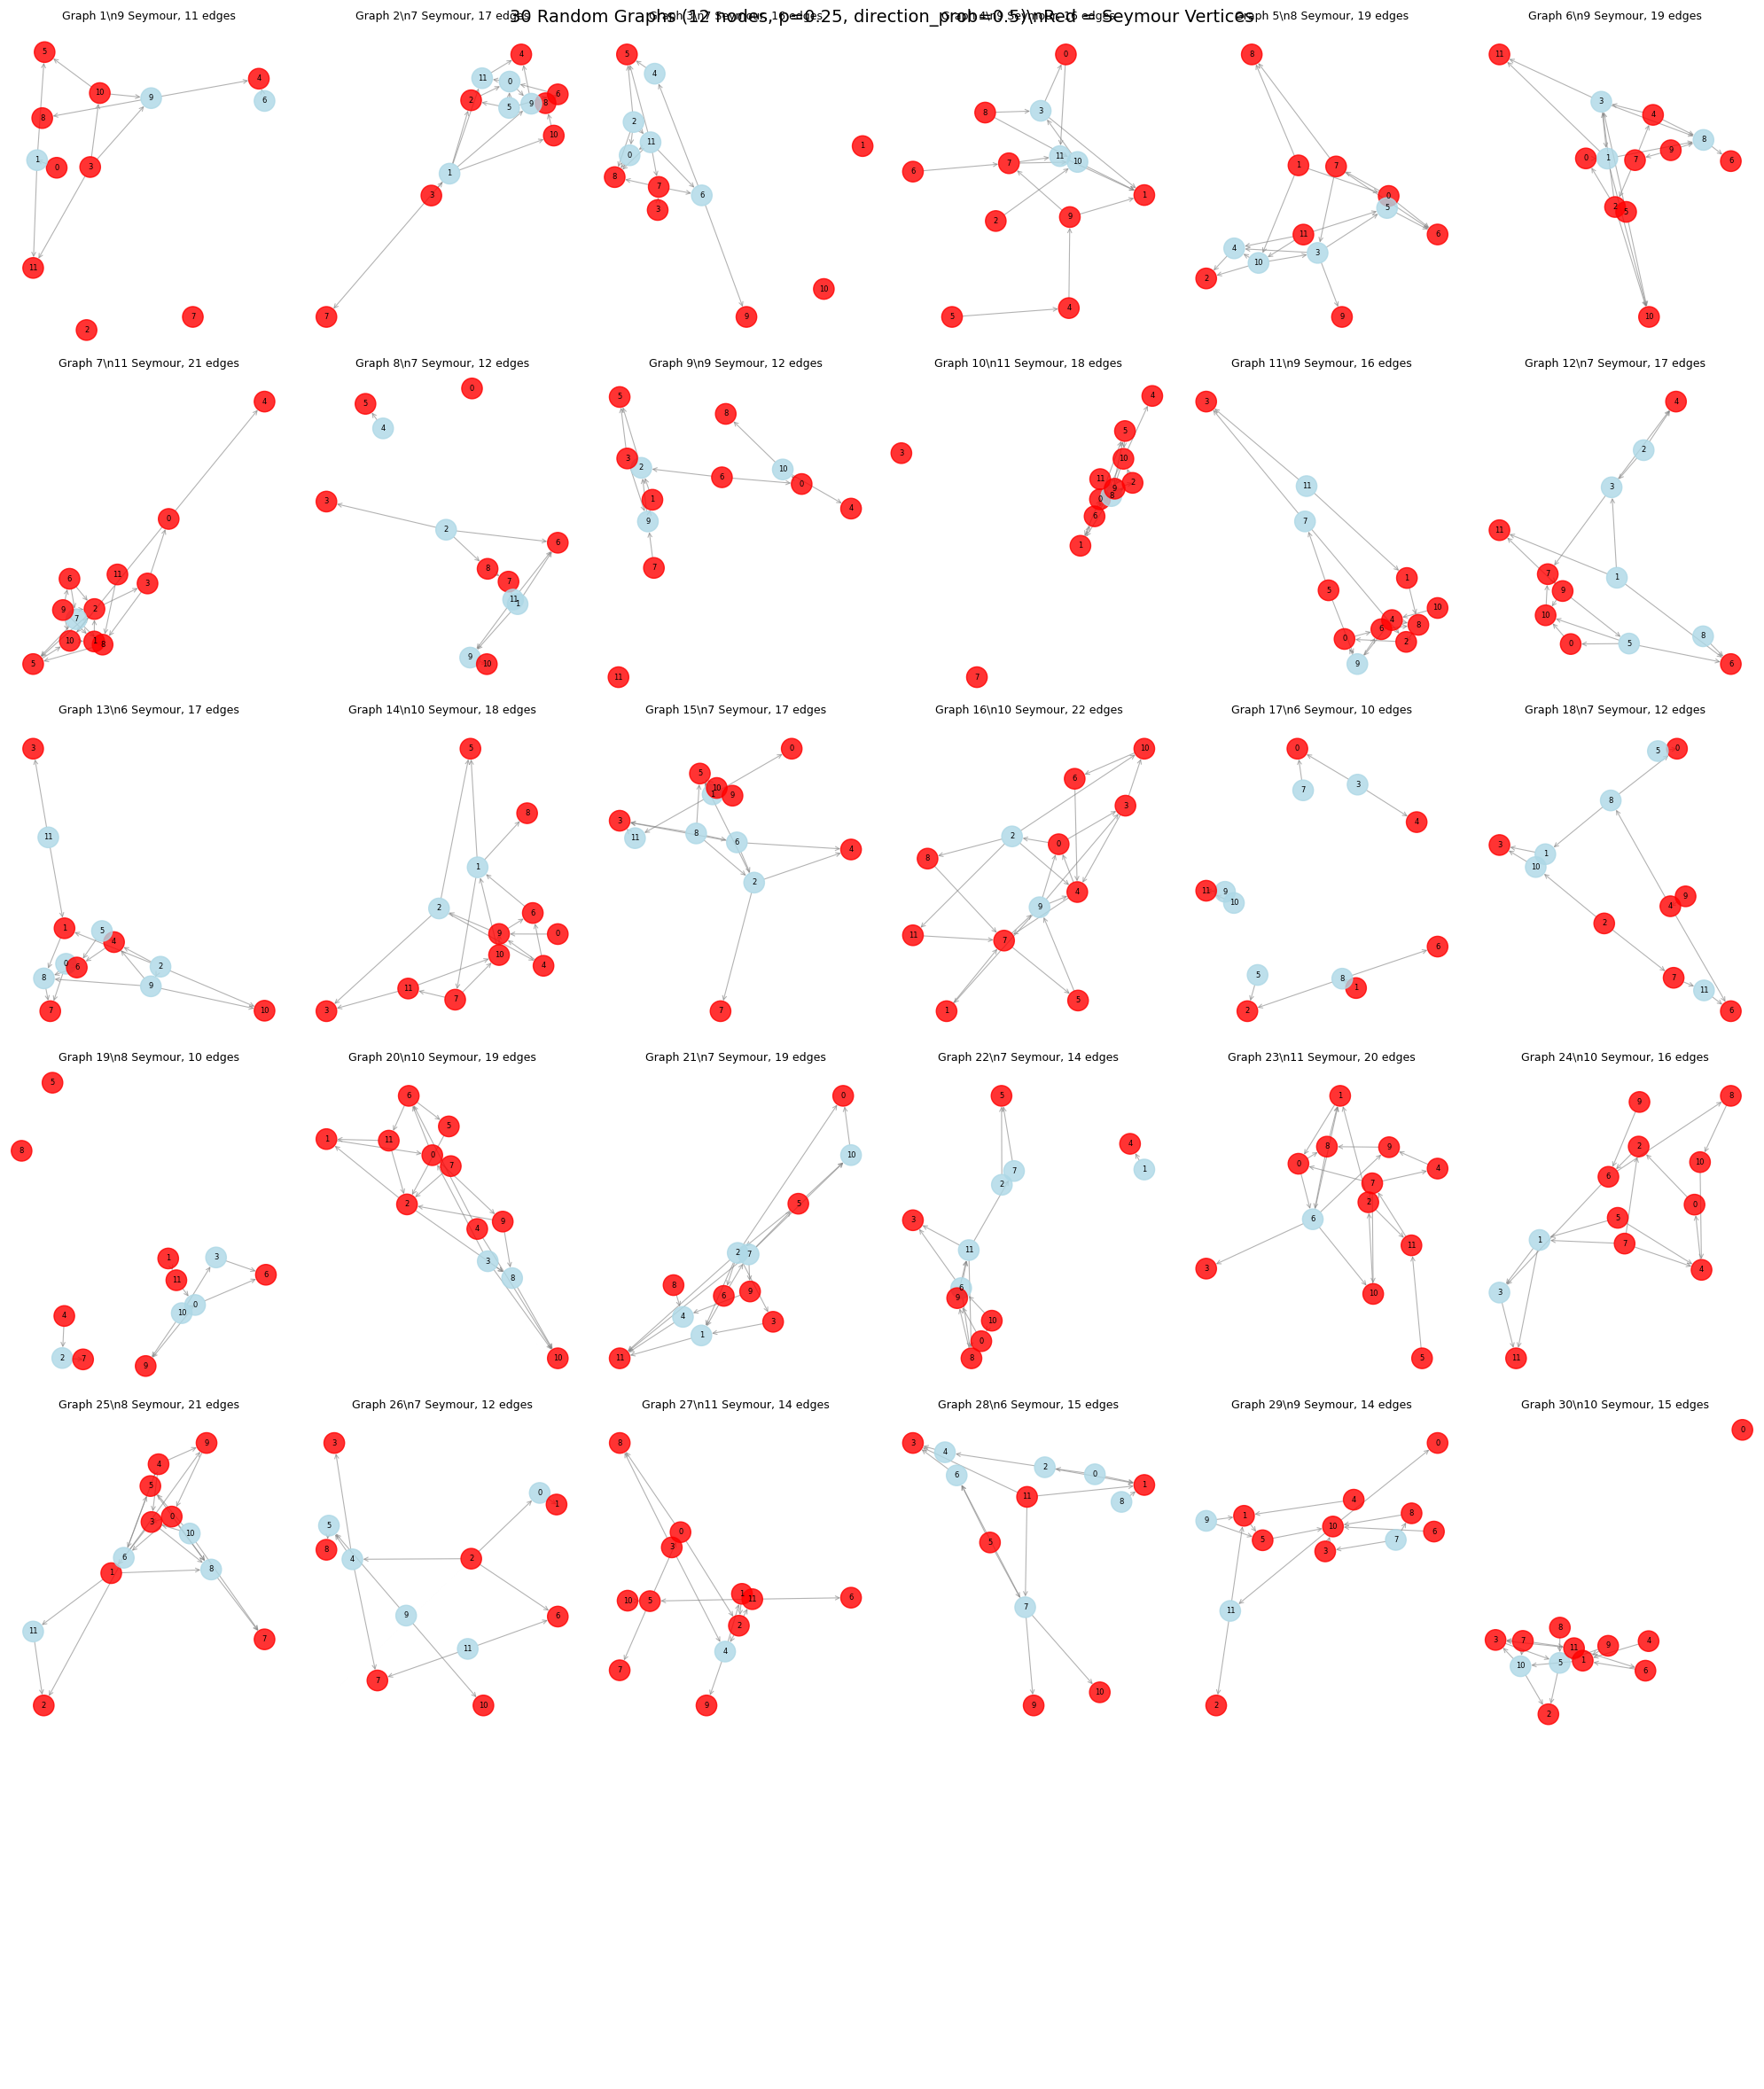

\n======================================================================
SUMMARY STATISTICS
Graphs with at least one Seymour vertex: 30/30 (100.0%)
Average Seymour vertices per graph: 8.43
Average edges per graph: 16.0
Total 2-cycles found: 0 (should be 0)
Seymour vertex distribution: {9: 6, 7: 9, 8: 3, 11: 4, 6: 3, 10: 5}
\n======================================================================
DETAILED RESULTS BY GRAPH
Graph | Edges | Seymour Count | 2-Cycles | Seymour Vertices
----------------------------------------------------------------------
    1 |    11 |             9 |        0 | [0, 2, 3, 4, 5, 7, 8, 10, 11]
    2 |    17 |             7 |        0 | [2, 3, 4, 6, 7, 8, 10]
    3 |    16 |             7 |        0 | [1, 3, 5, 7, 8, 9, 10]
    4 |    16 |             9 |        0 | [0, 1, 2, 4, 5, 6, 7, 8, 9]
    5 |    19 |             8 |        0 | [0, 1, 2, 6, 7, 8, 9, 11]
    6 |    19 |             9 |        0 | [0, 2, 4, 5, 6, 7, 9, 10, 11]
    7 |    21 |            

In [31]:
# EXAMPLE: Generate your original request (30 graphs with 12 nodes each)
results_30_12 = generate_and_display_graphs(N=30, M=12, p=0.25, e=0.5)